In [1]:
# importing packages
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# reading in CSV
df = pd.read_csv('creditcard.csv')
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
273545  165615.0 -0.671358  0.848997  1.834979 -0.563272  0.071805  0.246626   
12539    21949.0  1.261585  0.557168  0.472043  0.883499 -0.184916 -0.994220   
168889  119429.0  2.145652 -1.073728 -0.564655 -0.953850 -1.066191 -0.297436   
246621  153249.0 -1.344100 -1.182142  1.190400 -2.150509  0.191530 -0.234382   
265502  161913.0  1.961343 -0.715029 -1.703147 -0.613582  1.713865  3.913136   

              V7        V8        V9  ...       V21       V22       V23  \
273545  0.279990  0.313551  0.089157  ... -0.144584 -0.306642 -0.340585   
12539   0.076301 -0.353471  1.132502  ... -0.424684 -0.916617  0.126201   
168889 -1.173677  0.084913  0.034932  ...  0.344686  1.029718  0.105991   
246621 -0.162335  0.173311 -0.829303  ...  0.388810  1.199350  0.546962   
265502 -1.252671  1.054911  1.314417  ...  0.191787  0.691780  0.158595   

             V24       V25       V26       V27       V28  Amount  Class  
273545 -0.618444  0.369088 -0.624844  0.350159  0.126784    1.00      0  
12539   0.312282  0.235299  0.052098 -0.041715  0.026898    1.29      0  
168889 -0.382419 -0.179858 -0.078127  0.004817 -0.064935    5.95      0  
246621  0.707886  0.124164 -0.210443  0.099604  0.053481   66.00      0  
265502  0.726621 -0.060118 -0.192346  0.060914 -0.042846    9.99      0  

[5 rows x 31 columns]

In [3]:
# Check the types of response for the response variable (in this case, it's just 0 and 1)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df_zero = df[df['Class'] == 0]
df_one = df[df['Class'] == 1]

In [6]:
df_zero.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [7]:
df_one.head(10)

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
6331  7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6334  7535.0  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
6336  7543.0  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
6338  7551.0  0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353   
6427  7610.0  0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   
6331 -1.631735  0.154612 -2.795892  ...  0.364514 -0.608057 -0.539528   
6334 -1.689102  0.303253 -3.139409  ...  0.370509 -0.576752 -0.669605   
6336 -0.812891  0.133080 -2.214311  ...  0.156617 -0.652450 -0.551572   
6338 -0.746579  0.055586 -2.678679  ...  0.208828 -0.511747 -0.583813   
6427 -3.968593  1.063728 -0.486097  ...  0.589669  0.109541  0.601045   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  
6331  0.128940  1.488481  0.507963  0.735822  0.513574    1.00      1  
6334 -0.759908  1.605056  0.540675  0.737040  0.496699    1.00      1  
6336 -0.716522  1.415717  0.555265  0.530507  0.404474    1.00      1  
6338 -0.219845  1.474753  0.491192  0.518868  0.402528    1.00      1  
6427 -0.364700 -1.843078  0.351909  0.594550  0.099372    1.00      1  

[10 rows x 31 columns]

In [8]:
# Shuffle dataframe for response=0 and =1 so that train-test will not be biased in case rows that are similar are placed side by side
# Later on, we will reset the index and select by the index number by sections
from sklearn.utils import shuffle
df_zero = shuffle(df_zero)
df_one = shuffle(df_one)

In [9]:
df_zero.head(10)
# Notice indexes are scrambled now, meaning the DF is shuffled
# Now we need to reset indexes

Time        V1        V2        V3        V4        V5        V6  \
239960  150362.0  2.047890  0.111725 -1.803352  0.231603  0.640195 -0.379255   
155702  106173.0 -0.609409  0.717388  2.235283 -0.154805 -0.330174 -0.126641   
41522    40718.0 -0.736405  0.990598 -0.269066 -0.244532  1.935546  3.675422   
206827  136388.0  1.418723 -1.194791 -1.984672  0.133039  0.829466  1.479689   
68499    53018.0  1.089579  0.092248  0.352815  1.047891 -0.026522  0.354925   
106360   69935.0 -0.299013  1.209783  0.841016  1.082661 -0.467808 -1.046840   
132540   80021.0  1.006704 -1.956536 -0.147116 -1.607973 -1.070065  0.744347   
103569   68715.0 -0.003142  0.554451  0.579676 -0.649503 -0.154081 -1.373667   
2955      2500.0 -0.545070  0.900823  1.174433 -0.148957  0.876214  1.035892   
62985    50502.0  1.189319  0.147631  0.394972  1.162492 -0.515779 -0.884459   

              V7        V8        V9  ...       V21       V22       V23  \
239960  0.099140 -0.087327  0.211342  ... -0.327468 -0.864908  0.284974   
155702  0.127604  0.224505  1.489330  ... -0.229486 -0.541650 -0.224648   
41522  -0.570128  1.416500 -0.460843  ...  0.070098  0.044671 -0.079959   
206827  0.149591  0.312983  0.366906  ... -0.005464 -0.448810  0.067461   
68499  -0.205202  0.295345 -0.088671  ...  0.167600  0.490186 -0.052174   
106360  0.340720  0.261113 -0.661789  ...  0.191102  0.449185 -0.009516   
132540 -0.939571  0.127666 -1.939991  ... -0.220474 -0.871544 -0.202300   
103569  0.822429 -1.263275 -0.565856  ...  0.789704 -0.346732 -0.182952   
2955    0.354843  0.526486 -0.417472  ... -0.142364 -0.191616  0.113528   
62985   0.028185 -0.129993  0.271782  ...  0.116994  0.298632 -0.142350   

             V24       V25       V26       V27       V28  Amount  Class  
239960  0.193684 -0.240132  0.171304 -0.065565 -0.042547    4.49      0  
155702 -0.098500  0.161573 -0.716275  0.061937  0.061947   11.27      0  
41522   0.990600  0.192730 -0.298879  0.084325  0.031085    9.82      0  
206827 -0.926179 -0.439742  0.329470 -0.087281 -0.036939  278.00      0  
68499  -0.317793  0.450076 -0.235067  0.038077  0.003460   10.98      0  
106360  0.711352 -0.190425 -0.346857 -0.046034 -0.015688    9.95      0  
132540 -1.386973  0.113591 -0.341077  0.004568  0.047912  274.65      0  
103569  0.803824  1.052239  0.977560 -0.011204  0.184979   79.00      0  
2955   -1.017679 -0.472212  0.200674  0.316876  0.084066    1.79      0  
62985   0.380587  0.655436 -0.251230  0.011096  0.023765   27.30      0  

[10 rows x 31 columns]

In [10]:
df_one.head(10)
# Notice indexes are scrambled now, meaning the DF is shuffled
# Now we need to reset indexes

Time        V1        V2        V3        V4        V5        V6  \
248971  154181.0 -0.549615  2.219075 -3.522024  0.236995  1.087469 -1.235530   
30314    35866.0 -2.044489  3.368306 -3.937111  5.623120 -3.079232 -1.253474   
197586  132086.0 -0.361428  1.133472 -2.971360 -0.283073  0.371452 -0.574680   
57615    47982.0 -1.232804  2.244119 -1.703826  1.492536 -1.192985 -1.686110   
219892  141925.0  0.120301  1.974141 -0.434087  5.390793  1.289684  0.280590   
263080  160791.0  2.132386  0.705608 -3.530759  0.514779  1.527175 -1.716268   
147605   88737.0  1.917827  0.951967 -2.059206  3.833998  1.668192  0.769826   
157871  110552.0 -2.450367  2.107729 -5.140663  1.411304 -1.690780 -0.736427   
48094    43494.0 -1.278138  0.716242 -1.143279  0.217805 -1.293890 -1.168952   
151103   94625.0  1.707857  0.024881 -0.488140  3.787548  1.139451  2.914673   

              V7        V8        V9  ...       V21       V22       V23  \
248971 -0.279313  0.514361 -1.849927  ...  0.364130  0.210428 -0.366019   
30314  -5.778880  1.707428 -4.467103  ...  1.483594  0.834311 -0.148486   
197586  4.031513 -0.934398 -0.768255  ...  0.110815  0.563861 -0.408436   
57615  -1.864612  0.856122 -1.973535  ...  0.560475  0.165682 -0.013754   
219892  0.221963  0.067827 -1.387054  ... -0.038690  0.204554 -0.167313   
263080  1.132791 -0.574214  0.128904  ...  0.163739  0.703910 -0.245076   
147605  0.232463  0.107941 -1.143646  ...  0.015255  0.239994 -0.111916   
157871 -3.657946  1.944906 -0.788388  ...  0.800538  0.364617  0.233608   
48094  -2.564182  0.204532 -1.611155  ...  0.490183  0.470427 -0.126261   
151103 -0.743358  0.699136  1.008471  ...  0.010865  0.548258  0.091218   

             V24       V25       V26       V27       V28  Amount  Class  
248971  0.015803  0.349212  0.647302  0.171929  0.117188    0.76      1  
30314   0.001669 -0.038996  0.389526  1.300236  0.549940    7.61      1  
197586 -0.880079  1.408392 -0.137402 -0.001250 -0.182751  480.72      1  
57615   0.474935 -0.218725  0.302809  0.466031  0.250134    0.76      1  
219892  0.791547 -0.223675  0.473223 -0.160202  0.065039    0.76      1  
263080  0.460049  0.920281 -0.216586 -0.026219 -0.025001    1.00      1  
147605 -0.380576  0.370995  0.189117 -0.005823 -0.012105    9.21      1  
157871 -0.282078 -0.320311  0.492920  0.359976 -0.115471   80.22      1  
48094  -0.126644 -0.661908 -0.349793  0.454851  0.137843   24.90      1  
151103 -1.007959 -0.082183  0.179709  0.007738 -0.068841   33.76      1  

[10 rows x 31 columns]

In [11]:
df_zero = df_zero.reset_index(drop=True)
df_one = df_one.reset_index(drop=True)

In [12]:
df_zero.head(10)

Time        V1        V2        V3        V4        V5        V6  \
0  150362.0  2.047890  0.111725 -1.803352  0.231603  0.640195 -0.379255   
1  106173.0 -0.609409  0.717388  2.235283 -0.154805 -0.330174 -0.126641   
2   40718.0 -0.736405  0.990598 -0.269066 -0.244532  1.935546  3.675422   
3  136388.0  1.418723 -1.194791 -1.984672  0.133039  0.829466  1.479689   
4   53018.0  1.089579  0.092248  0.352815  1.047891 -0.026522  0.354925   
5   69935.0 -0.299013  1.209783  0.841016  1.082661 -0.467808 -1.046840   
6   80021.0  1.006704 -1.956536 -0.147116 -1.607973 -1.070065  0.744347   
7   68715.0 -0.003142  0.554451  0.579676 -0.649503 -0.154081 -1.373667   
8    2500.0 -0.545070  0.900823  1.174433 -0.148957  0.876214  1.035892   
9   50502.0  1.189319  0.147631  0.394972  1.162492 -0.515779 -0.884459   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.099140 -0.087327  0.211342  ... -0.327468 -0.864908  0.284974  0.193684   
1  0.127604  0.224505  1.489330  ... -0.229486 -0.541650 -0.224648 -0.098500   
2 -0.570128  1.416500 -0.460843  ...  0.070098  0.044671 -0.079959  0.990600   
3  0.149591  0.312983  0.366906  ... -0.005464 -0.448810  0.067461 -0.926179   
4 -0.205202  0.295345 -0.088671  ...  0.167600  0.490186 -0.052174 -0.317793   
5  0.340720  0.261113 -0.661789  ...  0.191102  0.449185 -0.009516  0.711352   
6 -0.939571  0.127666 -1.939991  ... -0.220474 -0.871544 -0.202300 -1.386973   
7  0.822429 -1.263275 -0.565856  ...  0.789704 -0.346732 -0.182952  0.803824   
8  0.354843  0.526486 -0.417472  ... -0.142364 -0.191616  0.113528 -1.017679   
9  0.028185 -0.129993  0.271782  ...  0.116994  0.298632 -0.142350  0.380587   

        V25       V26       V27       V28  Amount  Class  
0 -0.240132  0.171304 -0.065565 -0.042547    4.49      0  
1  0.161573 -0.716275  0.061937  0.061947   11.27      0  
2  0.192730 -0.298879  0.084325  0.031085    9.82      0  
3 -0.439742  0.329470 -0.087281 -0.036939  278.00      0  
4  0.450076 -0.235067  0.038077  0.003460   10.98      0  
5 -0.190425 -0.346857 -0.046034 -0.015688    9.95      0  
6  0.113591 -0.341077  0.004568  0.047912  274.65      0  
7  1.052239  0.977560 -0.011204  0.184979   79.00      0  
8 -0.472212  0.200674  0.316876  0.084066    1.79      0  
9  0.655436 -0.251230  0.011096  0.023765   27.30      0  

[10 rows x 31 columns]

In [13]:
df_one.head(10)

Time        V1        V2        V3        V4        V5        V6  \
0  154181.0 -0.549615  2.219075 -3.522024  0.236995  1.087469 -1.235530   
1   35866.0 -2.044489  3.368306 -3.937111  5.623120 -3.079232 -1.253474   
2  132086.0 -0.361428  1.133472 -2.971360 -0.283073  0.371452 -0.574680   
3   47982.0 -1.232804  2.244119 -1.703826  1.492536 -1.192985 -1.686110   
4  141925.0  0.120301  1.974141 -0.434087  5.390793  1.289684  0.280590   
5  160791.0  2.132386  0.705608 -3.530759  0.514779  1.527175 -1.716268   
6   88737.0  1.917827  0.951967 -2.059206  3.833998  1.668192  0.769826   
7  110552.0 -2.450367  2.107729 -5.140663  1.411304 -1.690780 -0.736427   
8   43494.0 -1.278138  0.716242 -1.143279  0.217805 -1.293890 -1.168952   
9   94625.0  1.707857  0.024881 -0.488140  3.787548  1.139451  2.914673   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.279313  0.514361 -1.849927  ...  0.364130  0.210428 -0.366019  0.015803   
1 -5.778880  1.707428 -4.467103  ...  1.483594  0.834311 -0.148486  0.001669   
2  4.031513 -0.934398 -0.768255  ...  0.110815  0.563861 -0.408436 -0.880079   
3 -1.864612  0.856122 -1.973535  ...  0.560475  0.165682 -0.013754  0.474935   
4  0.221963  0.067827 -1.387054  ... -0.038690  0.204554 -0.167313  0.791547   
5  1.132791 -0.574214  0.128904  ...  0.163739  0.703910 -0.245076  0.460049   
6  0.232463  0.107941 -1.143646  ...  0.015255  0.239994 -0.111916 -0.380576   
7 -3.657946  1.944906 -0.788388  ...  0.800538  0.364617  0.233608 -0.282078   
8 -2.564182  0.204532 -1.611155  ...  0.490183  0.470427 -0.126261 -0.126644   
9 -0.743358  0.699136  1.008471  ...  0.010865  0.548258  0.091218 -1.007959   

        V25       V26       V27       V28  Amount  Class  
0  0.349212  0.647302  0.171929  0.117188    0.76      1  
1 -0.038996  0.389526  1.300236  0.549940    7.61      1  
2  1.408392 -0.137402 -0.001250 -0.182751  480.72      1  
3 -0.218725  0.302809  0.466031  0.250134    0.76      1  
4 -0.223675  0.473223 -0.160202  0.065039    0.76      1  
5  0.920281 -0.216586 -0.026219 -0.025001    1.00      1  
6  0.370995  0.189117 -0.005823 -0.012105    9.21      1  
7 -0.320311  0.492920  0.359976 -0.115471   80.22      1  
8 -0.661908 -0.349793  0.454851  0.137843   24.90      1  
9 -0.082183  0.179709  0.007738 -0.068841   33.76      1  

[10 rows x 31 columns]

In [14]:
# Get number of rows
df_one.shape[0]

492

### Attempt to build for loop for cross validation - to select the right indexes

In [15]:
# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/5))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
    

98
Getting DF from index 0 to 98
Getting DF from index 98 to 196
Getting DF from index 196 to 294
Getting DF from index 294 to 392
Getting DF from index 392 to 492


In [16]:
df_one.iloc[0:]

Time        V1        V2         V3         V4        V5        V6  \
0    154181.0 -0.549615  2.219075  -3.522024   0.236995  1.087469 -1.235530   
1     35866.0 -2.044489  3.368306  -3.937111   5.623120 -3.079232 -1.253474   
2    132086.0 -0.361428  1.133472  -2.971360  -0.283073  0.371452 -0.574680   
3     47982.0 -1.232804  2.244119  -1.703826   1.492536 -1.192985 -1.686110   
4    141925.0  0.120301  1.974141  -0.434087   5.390793  1.289684  0.280590   
..        ...       ...       ...        ...        ...       ...       ...   
487   91554.0 -5.100256  3.633442  -3.843919   0.183208 -1.183997  1.602139   
488   36170.0 -5.685013  5.776516  -7.064977   5.902715 -4.715564 -1.755633   
489   25426.0  1.125336  1.130146  -0.962975   2.675688  0.990075 -0.243318   
490   11092.0  0.378275  3.914797  -5.726872   6.094141  1.698875 -2.807314   
491   14152.0 -4.710529  8.636214 -15.496222  10.313349 -4.351341 -3.322689   

            V7        V8        V9  ...       V21       V22       V23  \
0    -0.279313  0.514361 -1.849927  ...  0.364130  0.210428 -0.366019   
1    -5.778880  1.707428 -4.467103  ...  1.483594  0.834311 -0.148486   
2     4.031513 -0.934398 -0.768255  ...  0.110815  0.563861 -0.408436   
3    -1.864612  0.856122 -1.973535  ...  0.560475  0.165682 -0.013754   
4     0.221963  0.067827 -1.387054  ... -0.038690  0.204554 -0.167313   
..         ...       ...       ...  ...       ...       ...       ...   
487  -3.005953 -8.645038  1.285458  ...  8.280439 -2.797150  1.090707   
488  -6.958679  3.877795 -5.541529  ...  1.128641 -0.962960 -0.110045   
489   0.316192  0.122960 -1.143343  ... -0.166737 -0.521934 -0.112376   
490  -0.591118 -0.123496 -2.530713  ...  0.149896 -0.601967 -0.613724   
491 -10.788373  5.060381 -5.689311  ...  1.990545  0.223785  0.554408   

          V24       V25       V26       V27       V28  Amount  Class  
0    0.015803  0.349212  0.647302  0.171929  0.117188    0.76      1  
1    0.001669 -0.038996  0.389526  1.300236  0.549940    7.61      1  
2   -0.880079  1.408392 -0.137402 -0.001250 -0.182751  480.72      1  
3    0.474935 -0.218725  0.302809  0.466031  0.250134    0.76      1  
4    0.791547 -0.223675  0.473223 -0.160202  0.065039    0.76      1  
..        ...       ...       ...       ...       ...     ...    ...  
487 -0.159260  0.532156 -0.497126  0.943622  0.553581  261.22      1  
488 -0.177733 -0.089175 -0.049447  0.303445  0.219380  111.70      1  
489 -0.592077  0.520791  0.043354  0.015159  0.063612    3.76      1  
490 -0.403114  1.568445  0.521884  0.527938  0.411910    1.00      1  
491 -1.204042 -0.450685  0.641836  1.605958  0.721644    1.00      1  

[492 rows x 31 columns]

In [17]:
df_one.iloc[491]

Time      14152.000000
V1           -4.710529
V2            8.636214
V3          -15.496222
V4           10.313349
V5           -4.351341
V6           -3.322689
V7          -10.788373
V8            5.060381
V9           -5.689311
V10         -11.712187
V11          11.152491
V12         -16.558197
V13           0.302645
V14         -17.475921
V15          -0.412393
V16         -10.222203
V17         -13.799148
V18          -5.008585
V19           1.162026
V20           1.434240
V21           1.990545
V22           0.223785
V23           0.554408
V24          -1.204042
V25          -0.450685
V26           0.641836
V27           1.605958
V28           0.721644
Amount        1.000000
Class         1.000000
Name: 491, dtype: float64

### Selecting different sections of dataset with k-fold cross validation loop (k=5)

In [18]:
# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:end_index])
    

98
Getting DF from index 0 to 98
        Time         V1        V2         V3        V4         V5        V6  \
0   154181.0  -0.549615  2.219075  -3.522024  0.236995   1.087469 -1.235530   
1    35866.0  -2.044489  3.368306  -3.937111  5.623120  -3.079232 -1.253474   
2   132086.0  -0.361428  1.133472  -2.971360 -0.283073   0.371452 -0.574680   
3    47982.0  -1.232804  2.244119  -1.703826  1.492536  -1.192985 -1.686110   
4   141925.0   0.120301  1.974141  -0.434087  5.390793   1.289684  0.280590   
..       ...        ...       ...        ...       ...        ...       ...   
93   41237.0 -10.281784  6.302385 -13.271718  8.925115  -9.975578 -2.832513   
94   41243.0 -10.940739  6.261586 -14.182339  7.183602  -9.951363 -3.860820   
95   71033.0  -3.170818  0.185735  -3.399852  3.761155  -2.148047 -1.598944   
96   17838.0  -5.187878  6.967709 -13.510931  8.617895 -11.214422  0.672248   
97    8408.0  -1.813280  4.917851  -5.926130  5.701500   1.204393 -3.035138   

           V7     

In [19]:
# Cross validation number of splits
n = 6

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:end_index])
    

82
Getting DF from index 0 to 82
        Time         V1         V2        V3        V4        V5        V6  \
0   154181.0  -0.549615   2.219075 -3.522024  0.236995  1.087469 -1.235530   
1    35866.0  -2.044489   3.368306 -3.937111  5.623120 -3.079232 -1.253474   
2   132086.0  -0.361428   1.133472 -2.971360 -0.283073  0.371452 -0.574680   
3    47982.0  -1.232804   2.244119 -1.703826  1.492536 -1.192985 -1.686110   
4   141925.0   0.120301   1.974141 -0.434087  5.390793  1.289684  0.280590   
..       ...        ...        ...       ...       ...       ...       ...   
77   68207.0 -13.192671  12.785971 -9.906650  3.320337 -4.801176  5.760059   
78   40086.0   1.083693   1.179501 -1.346150  1.998824  0.818034 -0.771419   
79  160665.0  -0.417340   4.700055 -7.521767  7.671884  0.260821 -2.646693   
80   47826.0  -0.887287   1.390002  1.219686  1.661425  1.009228 -0.733908   
81  149640.0   0.754316   2.379822 -5.137274  3.818392  0.043203 -1.285451   

           V7         V8      

         Time         V1        V2         V3         V4         V5        V6  \
246   18675.0 -12.339603  4.488267 -16.587073  10.107274 -10.420199  0.130670   
247   12597.0  -2.589617  7.016714 -13.705407  10.343228  -2.954461 -3.055116   
248  156710.0   0.202402  1.176270   0.346379   2.882138   1.407133 -0.504355   
249  155554.0  -1.040067  3.106703  -5.409027   3.109903  -0.887237 -2.497522   
250  152710.0   0.051075  1.310427   0.733222   2.620282   1.402358  0.528489   
..        ...        ...       ...        ...        ...        ...       ...   
323   63578.0  -0.639191 -0.085595   1.265452   1.401166  -0.260542  1.009795   
324   55614.0  -7.347955  2.397041  -7.572356   5.177819  -2.854838 -1.795239   
325  155662.0  -1.928613  4.601506  -7.124053   5.716088   1.026579 -3.189073   
326   79540.0  -0.114361  1.036129   1.984405   3.128243  -0.740344  1.548619   
327  132688.0   0.432554  1.861373  -4.310353   2.448080   4.574094 -2.979912   

            V7        V8   

## To do stratified cross validation, we need to split the DFs into response 0s and 1s
### We shuffle both DFs
### Subsequently, we choose the first 20% of 0s and 20% of 1s and concat them together to be the test dataset
### The other 80% of 0s and 1s will become the training dataset
### This ensures every fold will have the same amount (balanced) number of fraud positive cases for training/testing
### Loop and select different sections of the dataset

In [20]:
# Besides getting the DF for the current section, we need to concat the two DFs (before start index and after end index) not in that section

# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        print('\n')
        print('Getting TRAIN DF from index 0 to ' + str(start_index) + ' and from index ' + str(end_index) + ' to ' + str(df_one.shape[0]))
        print(pd.concat([df_one.iloc[0:start_index],df_one.iloc[end_index:]], axis=0))
        print('\n')
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:df_one.shape[0]])
        print('Getting TRAIN DF from index 0 to ' + str(start_index))
        print(df_one.iloc[0:start_index])
    

98
Getting TEST DF from index 0 to 98
        Time         V1        V2         V3        V4         V5        V6  \
0   154181.0  -0.549615  2.219075  -3.522024  0.236995   1.087469 -1.235530   
1    35866.0  -2.044489  3.368306  -3.937111  5.623120  -3.079232 -1.253474   
2   132086.0  -0.361428  1.133472  -2.971360 -0.283073   0.371452 -0.574680   
3    47982.0  -1.232804  2.244119  -1.703826  1.492536  -1.192985 -1.686110   
4   141925.0   0.120301  1.974141  -0.434087  5.390793   1.289684  0.280590   
..       ...        ...       ...        ...       ...        ...       ...   
93   41237.0 -10.281784  6.302385 -13.271718  8.925115  -9.975578 -2.832513   
94   41243.0 -10.940739  6.261586 -14.182339  7.183602  -9.951363 -3.860820   
95   71033.0  -3.170818  0.185735  -3.399852  3.761155  -2.148047 -1.598944   
96   17838.0  -5.187878  6.967709 -13.510931  8.617895 -11.214422  0.672248   
97    8408.0  -1.813280  4.917851  -5.926130  5.701500   1.204393 -3.035138   

           V7

[98 rows x 31 columns]


Getting TRAIN DF from index 0 to 98 and from index 196 to 492
         Time        V1        V2         V3         V4        V5        V6  \
0    154181.0 -0.549615  2.219075  -3.522024   0.236995  1.087469 -1.235530   
1     35866.0 -2.044489  3.368306  -3.937111   5.623120 -3.079232 -1.253474   
2    132086.0 -0.361428  1.133472  -2.971360  -0.283073  0.371452 -0.574680   
3     47982.0 -1.232804  2.244119  -1.703826   1.492536 -1.192985 -1.686110   
4    141925.0  0.120301  1.974141  -0.434087   5.390793  1.289684  0.280590   
..        ...       ...       ...        ...        ...       ...       ...   
487   91554.0 -5.100256  3.633442  -3.843919   0.183208 -1.183997  1.602139   
488   36170.0 -5.685013  5.776516  -7.064977   5.902715 -4.715564 -1.755633   
489   25426.0  1.125336  1.130146  -0.962975   2.675688  0.990075 -0.243318   
490   11092.0  0.378275  3.914797  -5.726872   6.094141  1.698875 -2.807314   
491   14152.0 -4.710529  8.636214 -15.496222


Getting TEST DF from index 294 to 392
         Time         V1         V2         V3         V4         V5  \
294  128595.0  -5.313774   2.664274  -4.250707   0.394707  -0.391383   
295   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
296   41397.0 -14.970346   8.401421 -16.867238   8.252334 -13.565130   
297  128471.0   0.909124   1.337658  -4.484728   3.245358  -0.417809   
298   11131.0  -1.426623   4.141986  -9.804103   6.666273  -4.749527   
..        ...        ...        ...        ...        ...        ...   
387   50706.0  -8.461845   6.866198 -11.838269   4.194211  -6.923097   
388  102572.0 -28.709229  22.057729 -27.855811  11.845013 -18.983813   
389   68207.0 -13.192671  12.785971  -9.906650   3.320337  -4.801176   
390   41285.0 -12.835760   6.574615 -12.788462   8.786257 -10.723121   
391   96291.0  -3.552173   5.426461  -3.731810   6.679062  -2.187543   

           V6         V7         V8         V9  ...        V21       V22  \
294  0.683526  -5.13

[100 rows x 31 columns]
Getting TRAIN DF from index 0 to 392
         Time         V1         V2         V3         V4         V5  \
0    154181.0  -0.549615   2.219075  -3.522024   0.236995   1.087469   
1     35866.0  -2.044489   3.368306  -3.937111   5.623120  -3.079232   
2    132086.0  -0.361428   1.133472  -2.971360  -0.283073   0.371452   
3     47982.0  -1.232804   2.244119  -1.703826   1.492536  -1.192985   
4    141925.0   0.120301   1.974141  -0.434087   5.390793   1.289684   
..        ...        ...        ...        ...        ...        ...   
387   50706.0  -8.461845   6.866198 -11.838269   4.194211  -6.923097   
388  102572.0 -28.709229  22.057729 -27.855811  11.845013 -18.983813   
389   68207.0 -13.192671  12.785971  -9.906650   3.320337  -4.801176   
390   41285.0 -12.835760   6.574615 -12.788462   8.786257 -10.723121   
391   96291.0  -3.552173   5.426461  -3.731810   6.679062  -2.187543   

           V6         V7         V8         V9  ...        V21       V22  

In [21]:
# Try splitting by 7

# Cross validation number of splits
n = 7

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        print('\n')
        print('Getting TRAIN DF from index 0 to ' + str(start_index) + ' and from index ' + str(end_index) + ' to ' + str(df_one.shape[0]))
        print(pd.concat([df_one.iloc[0:start_index],df_one.iloc[end_index:]], axis=0))
        print('\n')
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:df_one.shape[0]])
        print('Getting TRAIN DF from index 0 to ' + str(start_index))
        print(df_one.iloc[0:start_index])
    

70
Getting TEST DF from index 0 to 70
        Time         V1        V2         V3        V4         V5        V6  \
0   154181.0  -0.549615  2.219075  -3.522024  0.236995   1.087469 -1.235530   
1    35866.0  -2.044489  3.368306  -3.937111  5.623120  -3.079232 -1.253474   
2   132086.0  -0.361428  1.133472  -2.971360 -0.283073   0.371452 -0.574680   
3    47982.0  -1.232804  2.244119  -1.703826  1.492536  -1.192985 -1.686110   
4   141925.0   0.120301  1.974141  -0.434087  5.390793   1.289684  0.280590   
..       ...        ...       ...        ...       ...        ...       ...   
65   35771.0  -3.218952  2.708535  -3.263042  1.361866  -1.645776 -1.852982   
66  152098.0  -4.124316  3.748597  -7.926507  7.763242  -0.769375 -2.031171   
67   41607.0 -18.247513  8.713250 -17.880127  9.249459 -14.541213 -1.911564   
68   55311.0  -6.159607  1.468713  -6.850888  5.174706  -2.986704 -1.795054   
69   65385.0  -2.923827  1.524837  -3.018758  3.289291  -5.755542  2.218276   

           V7

[70 rows x 31 columns]


Getting TRAIN DF from index 0 to 70 and from index 140 to 492
         Time        V1        V2         V3         V4        V5        V6  \
0    154181.0 -0.549615  2.219075  -3.522024   0.236995  1.087469 -1.235530   
1     35866.0 -2.044489  3.368306  -3.937111   5.623120 -3.079232 -1.253474   
2    132086.0 -0.361428  1.133472  -2.971360  -0.283073  0.371452 -0.574680   
3     47982.0 -1.232804  2.244119  -1.703826   1.492536 -1.192985 -1.686110   
4    141925.0  0.120301  1.974141  -0.434087   5.390793  1.289684  0.280590   
..        ...       ...       ...        ...        ...       ...       ...   
487   91554.0 -5.100256  3.633442  -3.843919   0.183208 -1.183997  1.602139   
488   36170.0 -5.685013  5.776516  -7.064977   5.902715 -4.715564 -1.755633   
489   25426.0  1.125336  1.130146  -0.962975   2.675688  0.990075 -0.243318   
490   11092.0  0.378275  3.914797  -5.726872   6.094141  1.698875 -2.807314   
491   14152.0 -4.710529  8.636214 -15.496222

[422 rows x 31 columns]


Getting TEST DF from index 210 to 280
         Time         V1         V2         V3         V4         V5  \
210  102676.0  -5.552122   5.678134  -9.775528   8.416295  -4.409844   
211   95559.0 -16.308650  11.614801 -19.739386  10.463866 -12.599146   
212  133184.0  -1.212682  -2.484824  -6.397186   3.670562  -0.863375   
213   97121.0 -17.976266  12.864989 -19.575066  11.345120 -13.998646   
214  166883.0   2.091900  -0.757459  -1.192258  -0.755458  -0.620324   
..        ...        ...        ...        ...        ...        ...   
275  118603.0  -6.677212   5.529299  -7.193275   6.081321  -1.636071   
276  152036.0  -4.320609   3.199939  -5.799736   6.502330   0.378479   
277   51155.0 -11.205461   7.914633 -13.987752   4.333341  -8.484970   
278   94362.0 -26.457745  16.497472 -30.177317   8.904157 -17.892600   
279   41164.0  -5.932778   4.571743  -9.427247   6.577056  -6.115218   

           V6         V7         V8        V9  ...       V21       V22 

[422 rows x 31 columns]


Getting TEST DF from index 350 to 420
         Time         V1         V2         V3         V4         V5  \
350   20931.0 -16.367923   9.223692 -23.270631  11.844777  -9.462037   
351   49985.0  -1.554216   1.694229  -0.903334   2.425436  -2.899787   
352  170348.0   1.991976   0.158476  -2.583441   0.408670   1.151147   
353   44532.0  -0.234922   0.355413   1.972183  -1.255593  -0.681387   
354   91407.0  -3.951209   2.881805  -6.421490   2.434181  -1.327325   
..        ...        ...        ...        ...        ...        ...   
415   97235.0 -17.537592  12.352519 -20.134613  11.122771 -14.571080   
416  154309.0  -0.082983  -3.935919  -2.616709   0.163310  -1.400952   
417   25231.0 -16.598665  10.541751 -19.818982   6.017295 -13.025901   
418   93879.0 -12.833631   7.508790 -20.491952   7.465780 -11.575304   
419  148479.0  -1.541678   3.846800  -7.604114   3.121459  -1.254924   

           V6         V7         V8        V9  ...       V21       V22 

# New model pipeline with cross validation (set n_fold)

### varlist argument for run_model 
### Specify the dataframe df
### varlist which is list of variables (needs to have response inside)
### response is response name in string
### standardize is whether to standardize variables (can change list of vars to standardize)
### sampletype is type of sampling to do
### modelname is type of model to use
### text is text to put for modelling
### n_fold is number of folds

In [3]:
# importing packages
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from collections import Counter

class modelpipeline:
    def __init__(self):
        pass
    
    def run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold):
        # Remove any features not wanted based on varlist input and re-order based on varlist
        df = df[varlist]
        # We have to remove response from varlist - varlist_noresponse - as it is used later to subset out features
        # Refer to the for loop for the cross validation where X_train and X_test is created at the end of loop
        varlist_noresponse = []
        for col in varlist:
            if col != response:
                varlist_noresponse.append(col)
            
            
        if isinstance(n_fold, int) and n_fold > 1:
            # Initialize dictionary to store results
            self.store = {"accuracy": [], "actual_accuracy": [], "sensitivity": [], "specificity": [], 
                          "precision": [], "f1": [], "auc": [], "pr_auc": [], "final": {}}
            
            # Split dataframes into 2, one for positive response and one for negative
            df_zero = df[df[response] == 0]
            df_one = df[df[response] == 1]
            
            # Shuffle dataframe for response=0 and =1 so that train-test will not be biased in case rows that are similar are placed side by side
            # Later on, we will reset the index and select by the index number by sections
            df_zero = shuffle(df_zero, random_state=42)
            df_one = shuffle(df_one, random_state=42)
            df_zero = df_zero.reset_index(drop=True)
            df_one = df_one.reset_index(drop=True)
        
            # Get the average number of records required for negative response and positive response for test records
            # Train records will then have all the other records not in the test records
            # n_fold is the number of folds for cross validation
            start_index_one = 0
            end_index_one = math.floor(df_one.shape[0]/n_fold)
            start_index_zero = 0
            end_index_zero = math.floor(df_zero.shape[0]/n_fold)
            
            for i in range(1,n_fold+1):
                if i != n_fold:
                    print('Getting TEST DF for response 1 from index ' + str(start_index_one) + ' to ' + str(end_index_one))
                    df_one_test = df_one.iloc[start_index_one:end_index_one]
                    print('Getting TRAIN DF for response 1 from index 0 to ' + str(start_index_one) + ' and from index ' + str(end_index_one) + ' to ' + str(df_one.shape[0]))
                    df_one_train = pd.concat([df_one.iloc[0:start_index_one],df_one.iloc[end_index_one:]], axis=0)
                    start_index_one += math.floor(df_one.shape[0]/n_fold)
                    end_index_one += math.floor(df_one.shape[0]/n_fold)
                    
                    print('Getting TEST DF for response 0 from index ' + str(start_index_zero) + ' to ' + str(end_index_zero))
                    df_zero_test = df_zero.iloc[start_index_zero:end_index_zero]
                    print('Getting TRAIN DF for response 0 from index 0 to ' + str(start_index_zero) + ' and from index ' + str(end_index_zero) + ' to ' + str(df_zero.shape[0]))
                    df_zero_train = pd.concat([df_zero.iloc[0:start_index_zero],df_zero.iloc[end_index_zero:]], axis=0)
                    start_index_zero += math.floor(df_zero.shape[0]/n_fold)
                    end_index_zero += math.floor(df_zero.shape[0]/n_fold)

                else:
                    # Last section of split needs to reach the end of dataset
                    print('Getting TEST DF for response 1 from index ' + str(start_index_one) + ' to ' + str(df_one.shape[0]))
                    df_one_test = df_one.iloc[start_index_one:df_one.shape[0]]
                    print('Getting TRAIN DF for response 1 from index 0 to ' + str(start_index_one))
                    df_one_train = df_one.iloc[0:start_index_one]
                    
                    # Last section of split needs to reach the end of dataset
                    print('Getting TEST DF for response 0 from index ' + str(start_index_zero) + ' to ' + str(df_zero.shape[0]))
                    df_zero_test = df_zero.iloc[start_index_zero:df_zero.shape[0]]
                    print('Getting TRAIN DF for response 0 from index 0 to ' + str(start_index_zero))
                    df_zero_train = df_zero.iloc[0:start_index_zero]
                    
                # Combine the subsetted sections for negatives and postives for both train and test before oversampling  
                df_train = pd.concat([df_one_train, df_zero_train], axis=0)
                df_test = pd.concat([df_one_test, df_zero_test], axis=0)
                # varlist_noresponse has the feature list X without Y while response is the Y
                # print(varlist_noresponse)
                X_train = df_train[varlist_noresponse]
                # print('Check X train vars after combining pds')
                # print(X_train.columns.values)
                y_train = df_train[response]
                X_test = df_test[varlist_noresponse]
                y_test = df_test[response]
                
                if standardize == True:
                    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
                    X_train = scaling.transform(X_train)
                    X_test = scaling.transform(X_test)
                    X_train = pd.DataFrame(X_train, columns=varlist_noresponse)
                    X_test = pd.DataFrame(X_test, columns=varlist_noresponse)

                if sampletype == 'smote':
                    X_train, X_test, y_train, y_test = sampling.smote_oversample(X_train, X_test, y_train, y_test, response)
                elif sampletype == 'adasyn':
                    X_train, X_test, y_train, y_test = sampling.adasyn_oversample(X_train, X_test, y_train, y_test, response)
                elif sampletype == 'naive':
                    X_train, X_test, y_train, y_test = sampling.naive_oversample(X_train, X_test, y_train, y_test, response)
                else:
                    # Convert all DF to numpy array for model building later
                    X_train = X_train.values
                    y_train = y_train.values
                    X_test = X_test.values
                    y_test = y_test.values
                
                # Build model in current fold/iteration and get accuracy, sensitivity, specificity, precision, f1, auc
                self.store = self.build_model(X_train, X_test, y_train, y_test, text, modelname, i, n_fold, self.store)
                
                # test model with all actual fraud results
                if standardize == True:
                    df_acc = pd.concat([pd.DataFrame(scaling.transform(df[varlist_noresponse]),columns=varlist_noresponse),df[response]],axis=1)
                    # print(df)
                    self.store['actual_accuracy'].append(evaluate.actual_acc(df_acc, self.store['model'], response))
                else:
                    self.store['actual_accuracy'].append(evaluate.actual_acc(df, self.store['model'], response))
                
            # Before results are returned, get average of all evaluation metrics and store in store['final'] section
            self.store['final']['accuracy'] = self.avg(self.store['accuracy'])
            self.store['final']['sensitivity'] = self.avg(self.store['sensitivity'])
            self.store['final']['specificity'] = self.avg(self.store['specificity'])
            self.store['final']['precision'] = self.avg(self.store['precision'])
            self.store['final']['f1'] = self.avg(self.store['f1'])
            self.store['final']['auc'] = self.avg(self.store['auc'])
            self.store['final']['pr_auc'] = self.avg(self.store['pr_auc'])
            self.store['final']['actual_accuracy'] = self.avg(self.store['actual_accuracy'])
            
            print('Final Results of ' + str(n_fold) + ' fold CV:')
            print(self.store['final'])
            return self.store
        
        else:
            print('n fold must be an integer greater than 1')
            return self.store
    
    def build_model(self, X_train, X_test, y_train, y_test, text, modelname, i, n_fold, store):
        if modelname == 'LogisticRegression':
            model = LogisticRegression(max_iter=300, C=0.8, solver='liblinear')
            model.fit(X_train,y_train)
        elif modelname == 'XGBoost':
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])),
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostminus1':
            # XGBoost with one less depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])-1),
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostplus1':
            # XGBoost with one more depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1]))+1,
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostplus3':
            # XGBoost with 3 more depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1]))+3,
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
            
        # Use Linear SVC instead of sklearn svm.SVC as the former as way faster processing speed
        # However, LinearSVC does not have .predict_proba function to get probability of response 1
        # Hence, we need to use CalibratedClassifier that provides .predict_proba functionality
        # On the bad side, it has it's own CV, so we put 10 fold CV to minimize the dataset loss due to train-test fold
        # Ideally, we should use the older pipeline code that does not do customized k-fold CV (refer to SCI16. Jupyter Notebook)
        elif modelname == 'SVM_Linear':
            model = LinearSVC(random_state=42) # default C=1 (regularization parameter)
            model = CalibratedClassifierCV(model, cv=10)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear2':
            model = LinearSVC(random_state=42, C=2)
            model = CalibratedClassifierCV(model, cv=10)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear0.5':
            model = LinearSVC(random_state=42, C=0.5)
            model = CalibratedClassifierCV(model, cv=10)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear0.3':
            model = LinearSVC(random_state=42, C=0.3)
            model = CalibratedClassifierCV(model, cv=10)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForest':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForestminus1':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))-1
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForestminus2':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))-2
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForestplus2':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))+2
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForestplus4':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))+4
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        else:
            # Parameters based on gridsearchcv of modelname = logistic regresion
            # Leave parameter blank for modelname to run this instance of logistic regression
            model = LogisticRegression(C=0.8, max_iter=300, solver='liblinear')
            model.fit(X_train,y_train)
        
        y_predict = model.predict(X_test)
        y_predictprob = model.predict_proba(X_test)[:, 1]
        store = evaluate.model_results(y_test, y_predict, y_predictprob, text, store, i, n_fold)
        
        # Store model for usage in measuring actual accuracy of fraud cases
        store['model'] = model
        print("Iteration " + str(i) + " out of " + str(n_fold) + " of CV for model fitting and obtaining results is complete!")
        print("\n")
        return store
    
    
    def avg(self, array):
        return sum(array) / len(array)

class sampling:
    def __init__(self):
        pass
    @staticmethod
    def naive_oversample(X_train, X_test, y_train, y_test, response):
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def smote_oversample(X_train, X_test, y_train, y_test, response):
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for SMOTE:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def adasyn_oversample(X_train, X_test, y_train, y_test, response):
        X_train, y_train = ADASYN().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for ADASYN:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test



class evaluate:
    def __init__(self):
        pass
    
    @staticmethod
    def model_results(y_test, y_predict, y_predictprob, text, store, i, n_fold):
        cm = metrics.confusion_matrix(y_test, y_predict)
        print(cm)
        RFC_CM = pd.DataFrame(cm, ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
        sns.heatmap(RFC_CM, annot=True, annot_kws={"size": 16}, cmap='Greens', linewidths=1, fmt='g')# font size
        sns.set(font_scale=1.4)#for label size
        plt.title("Confusion Matrix for " + text)

        # fix for mpl bug that cuts off top/bottom of seaborn viz
        b, t = plt.ylim() 
        b += 0.5 
        t -= 0.5 
        plt.ylim(b, t) 
        plt.figure(1,figsize=(4,4))
        plt.show() 

        accuracy = metrics.accuracy_score(y_test, y_predict)
        # print('Accuracy: ' + str(accuracy))
        sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
        recall = sensitivity
        # print('Sensitivity: ' + str(sensitivity))
        specificity = cm[0][0] / (cm[0][0] + cm[0][1])
        # print('Specificity: ' + str(specificity))
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        # print('Precision: ' + str(precision))
        f1 = 2 * (recall * precision)/(recall + precision)
        # print('f1 score: ' + str(f1))
        auc, pr_auc = evaluate.ROC(y_test, y_predictprob, text, i, n_fold)
        
        store['accuracy'].append(accuracy)
        store['sensitivity'].append(sensitivity)
        store['specificity'].append(specificity)
        store['precision'].append(precision)
        store['f1'].append(f1)
        store['auc'].append(auc)
        store['pr_auc'].append(pr_auc)

        return store
    
#     @staticmethod
#     def ROC(y_test, y_predictprob, text):
#         # IMPORTANT: first argument is true values, second argument is predicted probabilities
#         auc = metrics.roc_auc_score(y_test, y_predictprob)
#         # print("AUC value is: " + str(auc))
#         fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predictprob)
#         # print("AUC value is also: " + str(metrics.auc(fpr, tpr)))
#         plt.plot(fpr, tpr)
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.0])
#         plt.title('ROC curve for ' + text)
#         plt.xlabel('False Positive Rate (1 - Specificity)')
#         plt.ylabel('True Positive Rate (Sensitivity)')
#         plt.grid(True)
#         return auc

    @staticmethod
    def ROC(y_test, y_predictprob, text, i, n_fold):
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        auc = metrics.roc_auc_score(y_test, y_predictprob)
        # print("AUC value is: " + str(auc))
        print("AUC value is: " + str(auc))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predictprob)
        # print("AUC value is also: " + str(metrics.auc(fpr, tpr)))
        # Calculate precision and recall for each threshold
        precision, recall, _ = metrics.precision_recall_curve(y_test, y_predictprob)
        pr_auc = metrics.auc(recall, precision)
        # Only show ROC-AUC graph and PR-AUC graph on last iteration as they look very similar
        # The full results can be obtained in the results section
        if n_fold == i:
            fullgraph = plt.figure(1,figsize=(10,20))
            plt.style.use('ggplot')
            ROCAUC_plot = fullgraph.add_subplot(211)
            ROCAUC_plot.plot(fpr, tpr, color='blue')
            ROCAUC_plot.set_title('ROC curve for ' + text)
            ROCAUC_plot.set_xlabel('False Positive Rate (1 - Specificity)')
            ROCAUC_plot.set_ylabel('True Positive Rate (Sensitivity)')
            ROCAUC_plot.set_xlim([0.0, 1.0])
            ROCAUC_plot.set_ylim([0.0, 1.0])
            ROCAUC_plot.grid(True)
            PRAUC_plot = fullgraph.add_subplot(212)
            PRAUC_plot.plot(precision, recall, color='purple')
            PRAUC_plot.set_title('Precision-Recall curve for ' + text)
            PRAUC_plot.set_xlabel('Recall')
            PRAUC_plot.set_ylabel('Precision')
            PRAUC_plot.set_xlim([0.0, 1.0])
            PRAUC_plot.set_ylim([0.0, 1.0])
            PRAUC_plot.grid(True)
        return auc, pr_auc

    @staticmethod
    def actual_acc(df, model, response):
        allpositive = df[df[response] == 1]
        x_positive = allpositive.drop([response], axis=1)
        y_positive = allpositive[response]
        # Convert to numpy array due to XGBoost model.predict not working well for pandas
        x_positive = x_positive.values
        y_positive = y_positive.values
        y_pospredict = model.predict(x_positive)
        accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
        # print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
        return accuracy_positive

### Initialize class modelpipeline that will run through entire model pipeline from start to end

In [4]:
modelpipeline = modelpipeline()

### Remove unnecessary features (e.g. Time) that are not useful for the model
### Put this variable list (varlist) as a input to modelpipeline

In [5]:
varlist = list(df.columns.values)
varlist.remove('Time')
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 70
Getting TRAIN DF for response 1 from index 0 to 0 and from index 70 to 492
Getting TEST DF for response 0 from index 0 to 40616
Getting TRAIN DF for response 0 from index 0 to 0 and from index 40616 to 284315
Oversampling is complete!
[[39724   892]
 [    2    68]]


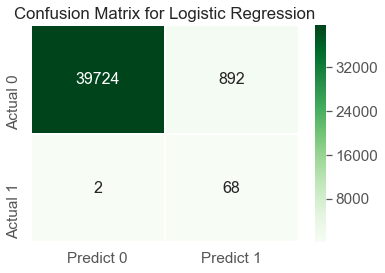

AUC value is: 0.997734882804806
Iteration 1 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 70 to 140
Getting TRAIN DF for response 1 from index 0 to 70 and from index 140 to 492
Getting TEST DF for response 0 from index 40616 to 81232
Getting TRAIN DF for response 0 from index 0 to 40616 and from index 81232 to 284315
Oversampling is complete!
[[39688   928]
 [    7    63]]


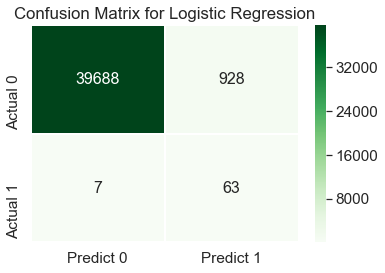

AUC value is: 0.978770153915417
Iteration 2 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 140 to 210
Getting TRAIN DF for response 1 from index 0 to 140 and from index 210 to 492
Getting TEST DF for response 0 from index 81232 to 121848
Getting TRAIN DF for response 0 from index 0 to 81232 and from index 121848 to 284315
Oversampling is complete!
[[39779   837]
 [   10    60]]


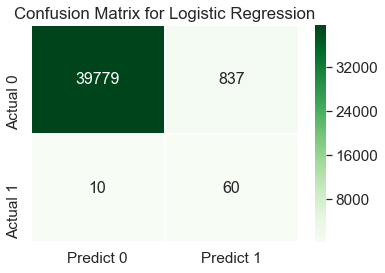

AUC value is: 0.9736666057007795
Iteration 3 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 210 to 280
Getting TRAIN DF for response 1 from index 0 to 210 and from index 280 to 492
Getting TEST DF for response 0 from index 121848 to 162464
Getting TRAIN DF for response 0 from index 0 to 121848 and from index 162464 to 284315
Oversampling is complete!
[[39727   889]
 [    5    65]]


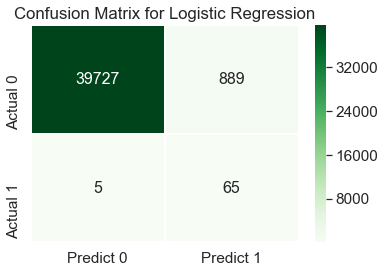

AUC value is: 0.9718615464700752
Iteration 4 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 280 to 350
Getting TRAIN DF for response 1 from index 0 to 280 and from index 350 to 492
Getting TEST DF for response 0 from index 162464 to 203080
Getting TRAIN DF for response 0 from index 0 to 162464 and from index 203080 to 284315
Oversampling is complete!
[[39740   876]
 [    8    62]]


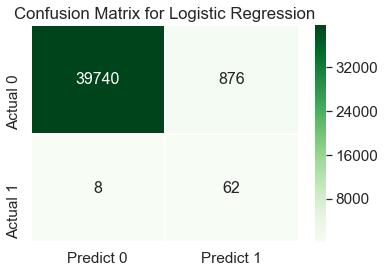

AUC value is: 0.9650514223810462
Iteration 5 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 350 to 420
Getting TRAIN DF for response 1 from index 0 to 350 and from index 420 to 492
Getting TEST DF for response 0 from index 203080 to 243696
Getting TRAIN DF for response 0 from index 0 to 203080 and from index 243696 to 284315
Oversampling is complete!
[[39666   950]
 [    3    67]]


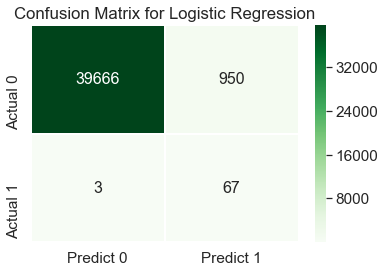

AUC value is: 0.9839560060778301
Iteration 6 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 420 to 492
Getting TRAIN DF for response 1 from index 0 to 420
Getting TEST DF for response 0 from index 243696 to 284315
Getting TRAIN DF for response 0 from index 0 to 243696
Oversampling is complete!
[[39669   950]
 [   10    62]]


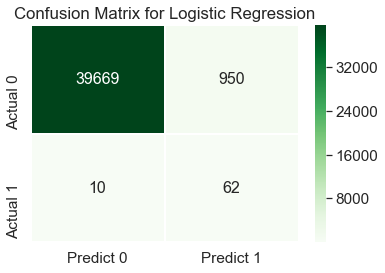

AUC value is: 0.9759824356964858
Iteration 7 out of 7 of CV for model fitting and obtaining results is complete!


Final Results of 7 fold CV:
{'accuracy': 0.9776445318579327, 'sensitivity': 0.9087301587301587, 'specificity': 0.9777641118356203, 'precision': 0.06609603274020268, 'f1': 0.12321786802174581, 'auc': 0.9781461504352057, 'pr_auc': 0.745030687832921, 'actual_accuracy': 0.9155052264808363}


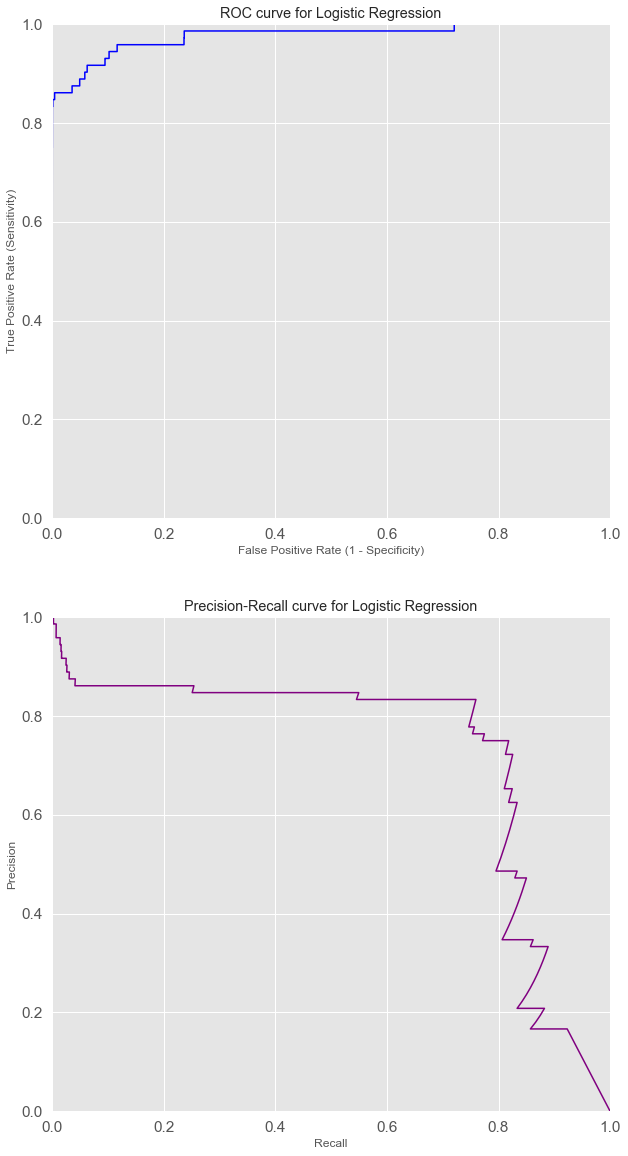

In [36]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'LogisticRegression', 'Logistic Regression', 7)

## results show the full results for all n folds - for the averaged results that have less variance, use results['final']

In [37]:
results

{'accuracy': [0.9780268396991594,
  0.9770191220567271,
  0.979182028216094,
  0.9780268396991594,
  0.9782726244899965,
  0.9765767094332203,
  0.976407559411172],
 'actual_accuracy': [0.9146341463414634,
  0.9146341463414634,
  0.9126016260162602,
  0.9186991869918699,
  0.9105691056910569,
  0.9207317073170732,
  0.9166666666666666],
 'sensitivity': [0.9714285714285714,
  0.9,
  0.8571428571428571,
  0.9285714285714286,
  0.8857142857142857,
  0.9571428571428572,
  0.8611111111111112],
 'specificity': [0.9780382115422493,
  0.9771518613354343,
  0.9793923576915501,
  0.978112074059484,
  0.9784321449675005,
  0.976610202875714,
  0.9766119303774096],
 'precision': [0.07083333333333333,
  0.06357214934409687,
  0.06688963210702341,
  0.06813417190775681,
  0.06609808102345416,
  0.06588003933136677,
  0.06126482213438735],
 'f1': [0.1320388349514563,
  0.11875589066918002,
  0.12409513960703206,
  0.12695312499999997,
  0.12301587301587302,
  0.12327506899724014,
  0.1143911439114391

In [38]:
results['final']

{'accuracy': 0.9776445318579327,
 'sensitivity': 0.9087301587301587,
 'specificity': 0.9777641118356203,
 'precision': 0.06609603274020268,
 'f1': 0.12321786802174581,
 'auc': 0.9781461504352057,
 'pr_auc': 0.745030687832921,
 'actual_accuracy': 0.9155052264808363}

### Try 5 fold cross validation instead of 7 for logistic regression

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55622  1241]
 [    6    92]]


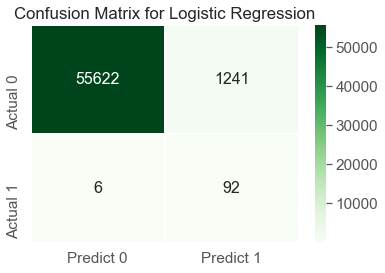

AUC value is: 0.9913671850746173
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55556  1307]
 [   10    88]]


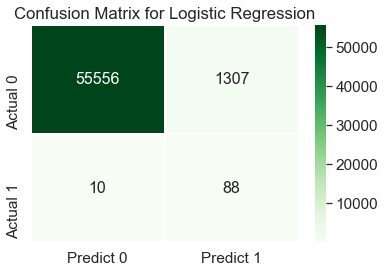

AUC value is: 0.9795140450355617
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55697  1166]
 [   10    88]]


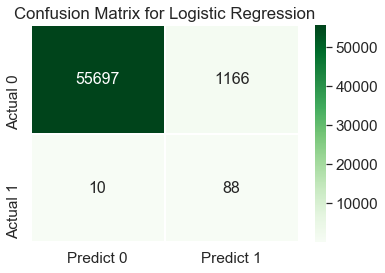

AUC value is: 0.9680585668310551
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55609  1254]
 [    9    89]]


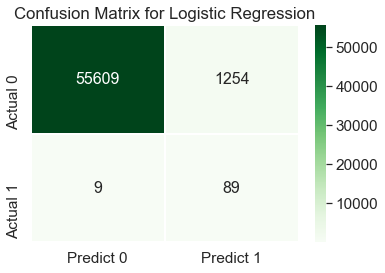

AUC value is: 0.9850019039675382
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55536  1327]
 [   13    87]]


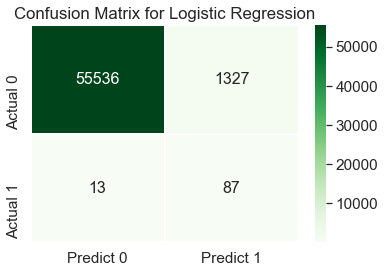

AUC value is: 0.9725877987443504
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9777287865314298, 'sensitivity': 0.9025714285714285, 'specificity': 0.9778590647697097, 'precision': 0.06601445146172352, 'f1': 0.12301901138720266, 'auc': 0.9793058999306246, 'pr_auc': 0.7418270935959361, 'actual_accuracy': 0.9150406504065041}


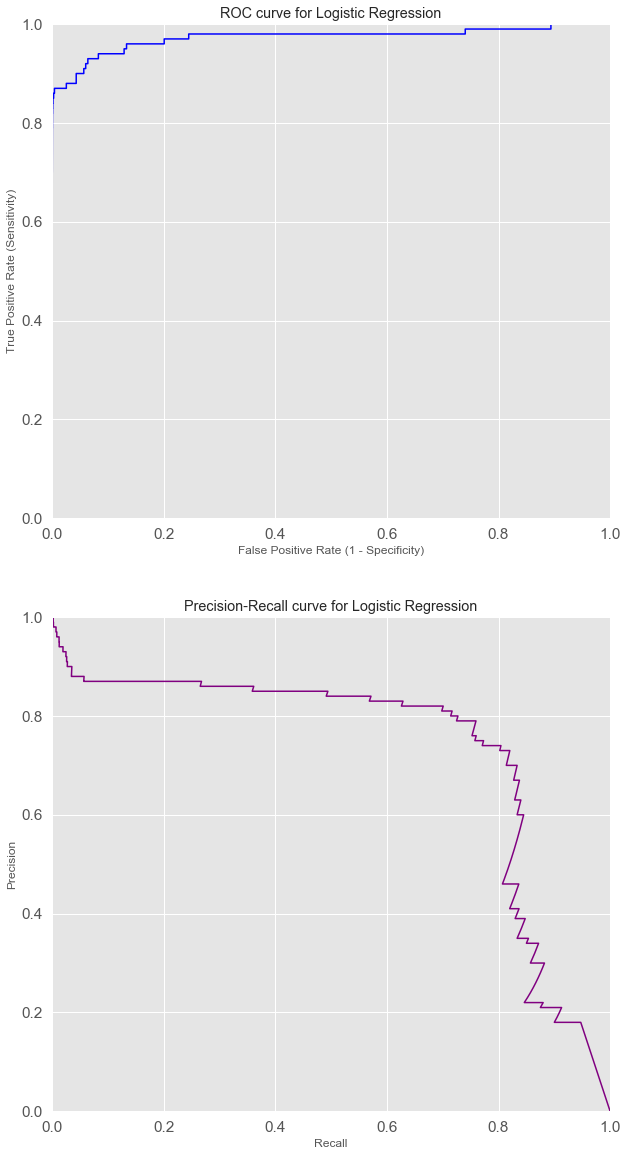

In [39]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'LogisticRegression', 'Logistic Regression', 5)

In [40]:
results

{'accuracy': [0.9781078281631291,
  0.9768789171538421,
  0.9793542950439774,
  0.9778269342181493,
  0.9764759580780507],
 'actual_accuracy': [0.9166666666666666,
  0.9166666666666666,
  0.9146341463414634,
  0.9126016260162602,
  0.9146341463414634],
 'sensitivity': [0.9387755102040817,
  0.8979591836734694,
  0.8979591836734694,
  0.9081632653061225,
  0.87],
 'specificity': [0.978175615074829,
  0.9770149306227248,
  0.9794945746794929,
  0.9779469954100206,
  0.9766632080614811],
 'precision': [0.0690172543135784,
  0.06308243727598567,
  0.07017543859649122,
  0.06626954579300075,
  0.06152758132956153],
 'f1': [0.12858141160027953,
  0.11788345612860014,
  0.1301775147928994,
  0.12352532963219987,
  0.11492734478203435],
 'auc': [0.9913671850746173,
  0.9795140450355617,
  0.9680585668310551,
  0.9850019039675382,
  0.9725877987443504],
 'pr_auc': [0.7176976170698623,
  0.8040396423407833,
  0.7422466107418105,
  0.7128290840528959,
  0.7323225137743286],
 'final': {'accuracy':

In [41]:
results['final']

{'accuracy': 0.9777287865314298,
 'sensitivity': 0.9025714285714285,
 'specificity': 0.9778590647697097,
 'precision': 0.06601445146172352,
 'f1': 0.12301901138720266,
 'auc': 0.9793058999306246,
 'pr_auc': 0.7418270935959361,
 'actual_accuracy': 0.9150406504065041}

### Try SMOTE sampling, 5 fold CV for logistic regression

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55559  1304]
 [    6    92]]


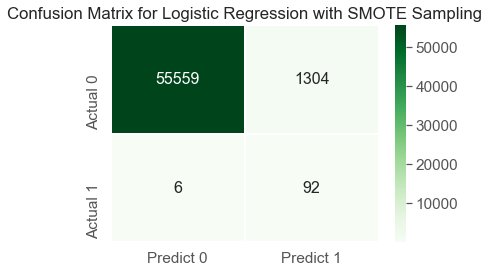

AUC value is: 0.9906872479396416
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55400  1463]
 [    9    89]]


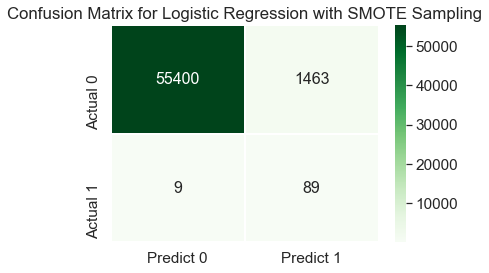

AUC value is: 0.9768069477408465
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55673  1190]
 [   10    88]]


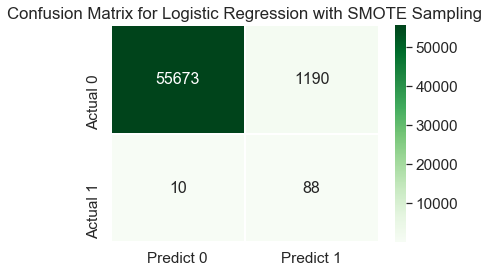

AUC value is: 0.9659616902350692
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55516  1347]
 [    8    90]]


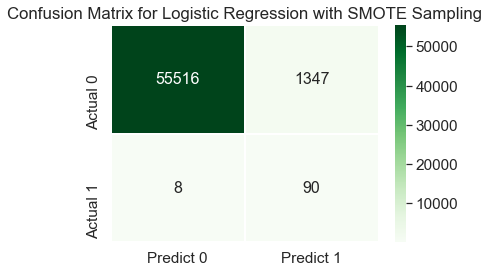

AUC value is: 0.9851954411013654
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55459  1404]
 [   12    88]]


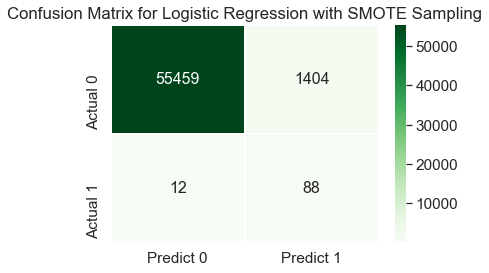

AUC value is: 0.9733364402159577
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9762892144326211, 'sensitivity': 0.9086530612244899, 'specificity': 0.9764064505917732, 'precision': 0.06274344860332737, 'f1': 0.11735233519449464, 'auc': 0.9783975534465761, 'pr_auc': 0.736401739446128, 'actual_accuracy': 0.9170731707317072}


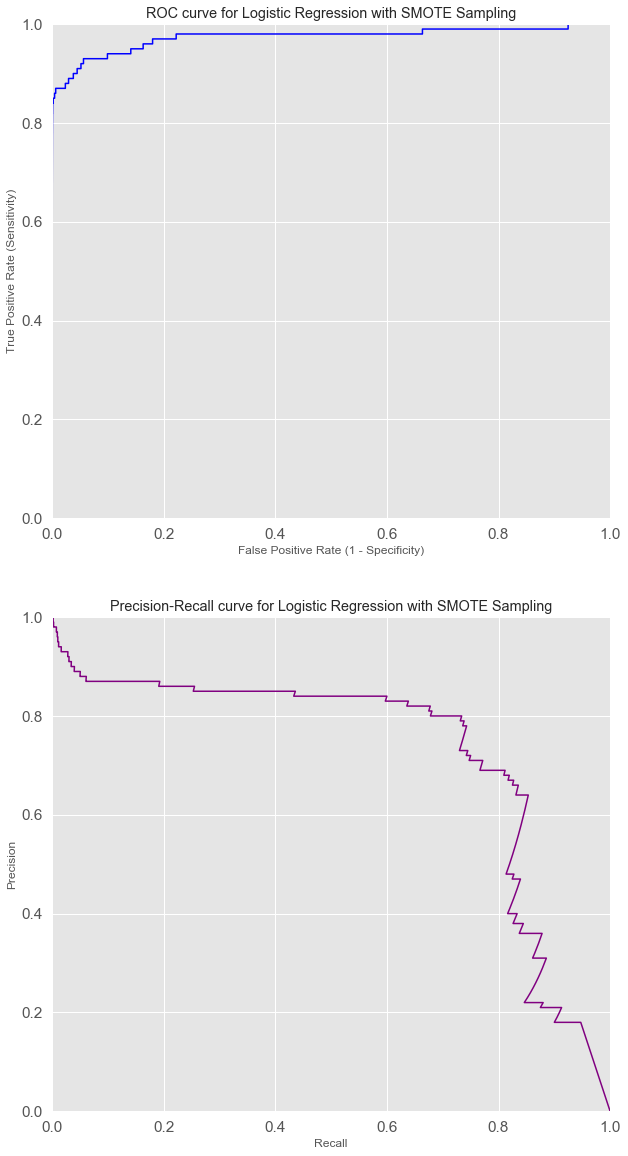

In [42]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'LogisticRegression', 'Logistic Regression with SMOTE Sampling', 5)

In [43]:
results['final']

{'accuracy': 0.9762892144326211,
 'sensitivity': 0.9086530612244899,
 'specificity': 0.9764064505917732,
 'precision': 0.06274344860332737,
 'f1': 0.11735233519449464,
 'auc': 0.9783975534465761,
 'pr_auc': 0.736401739446128,
 'actual_accuracy': 0.9170731707317072}

### AUC values look good for logistic regression but precision and f1 score is low. Means there's many False Positives
### Or fraud suspected but actually False. It depends on the business context whether this is an issue

In [44]:
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


# Run pipeline with SVM models
## We try linear SVM, with both naive/smote sampling, and different C regularization values (C=1 default, C=2, C=0.5)
### The lower the C, the more the regularization, which is good for noisy dataset

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55839  1024]
 [    6    92]]


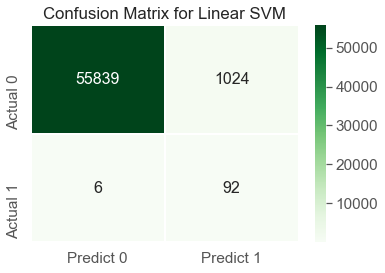

AUC value is: 0.9925625034319867
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55718  1145]
 [   10    88]]


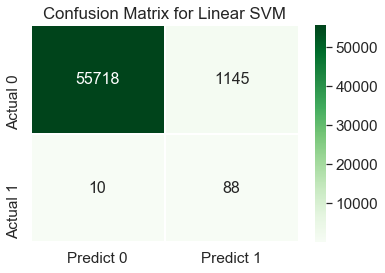

AUC value is: 0.9803101762309482
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55920   943]
 [   12    86]]


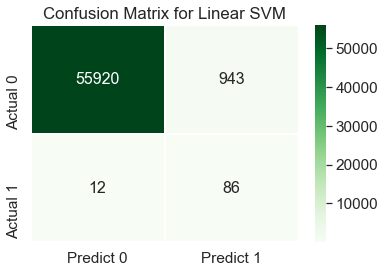

AUC value is: 0.9742738274987466
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55859  1004]
 [    9    89]]


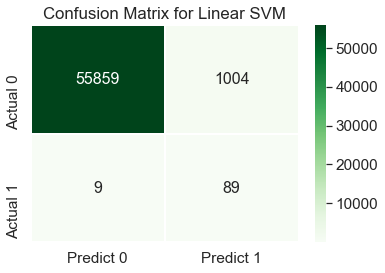

AUC value is: 0.9867976629830308
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55837  1026]
 [   13    87]]


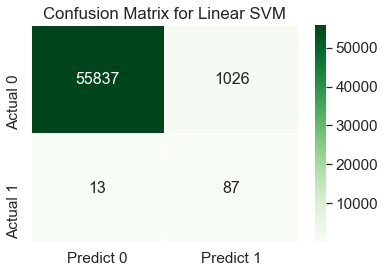

AUC value is: 0.972324358545979
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9817701110578124, 'sensitivity': 0.8984897959183673, 'specificity': 0.9819144259008494, 'precision': 0.07939571693402717, 'f1': 0.14586285792871018, 'auc': 0.9812537057381382, 'pr_auc': 0.7203834954733284, 'actual_accuracy': 0.9097560975609754}


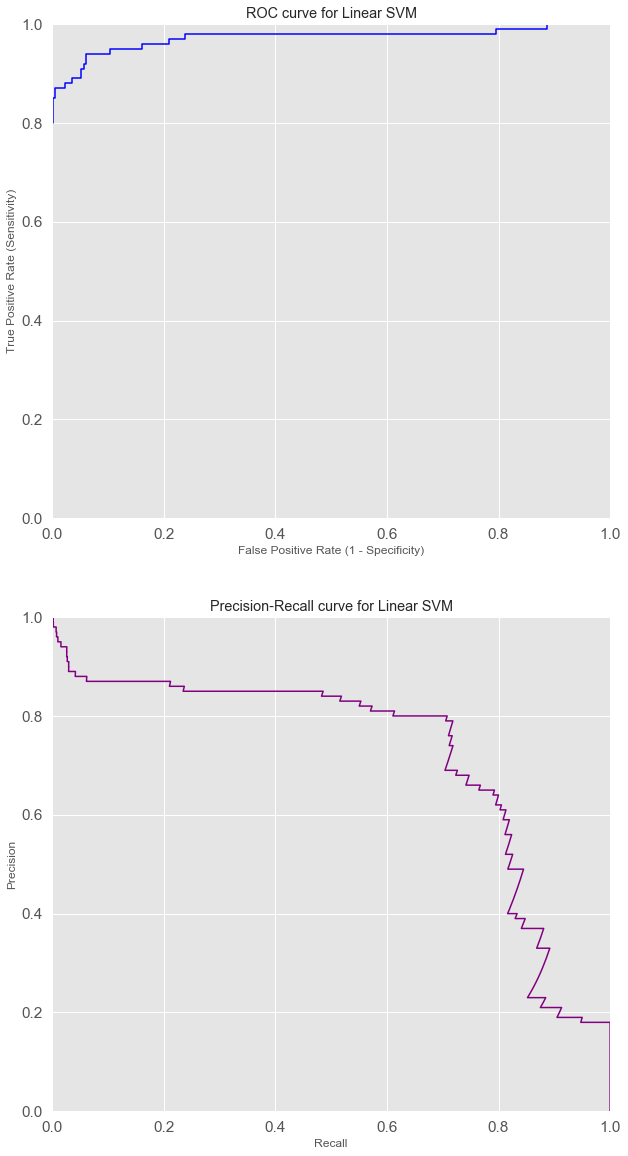

In [45]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear', 'Linear SVM', 5)

In [46]:
results['final']

{'accuracy': 0.9817701110578124,
 'sensitivity': 0.8984897959183673,
 'specificity': 0.9819144259008494,
 'precision': 0.07939571693402717,
 'f1': 0.14586285792871018,
 'auc': 0.9812537057381382,
 'pr_auc': 0.7203834954733284,
 'actual_accuracy': 0.9097560975609754}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55845  1018]
 [    6    92]]


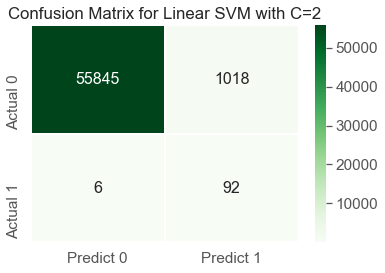

AUC value is: 0.9925608883794096
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[55730  1133]
 [   10    88]]


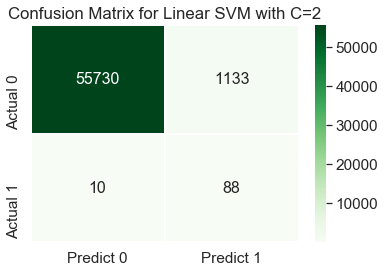

AUC value is: 0.9802636986067839
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55928   935]
 [   12    86]]


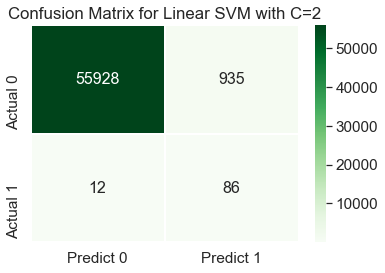

AUC value is: 0.9744771446731797
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55867   996]
 [    9    89]]


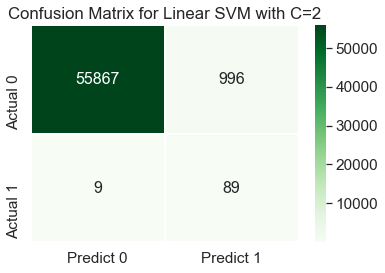

AUC value is: 0.9868098656025026
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55841  1022]
 [   13    87]]


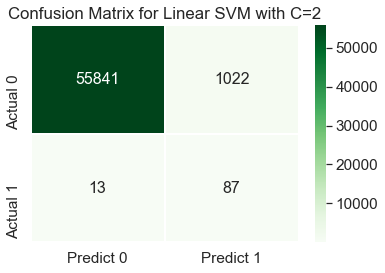

AUC value is: 0.9723848548265128
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9819035351885613, 'sensitivity': 0.8984897959183673, 'specificity': 0.982048080474122, 'precision': 0.07993256077219595, 'f1': 0.1467692968986059, 'auc': 0.9812992904176777, 'pr_auc': 0.7201142544636184, 'actual_accuracy': 0.9097560975609754}


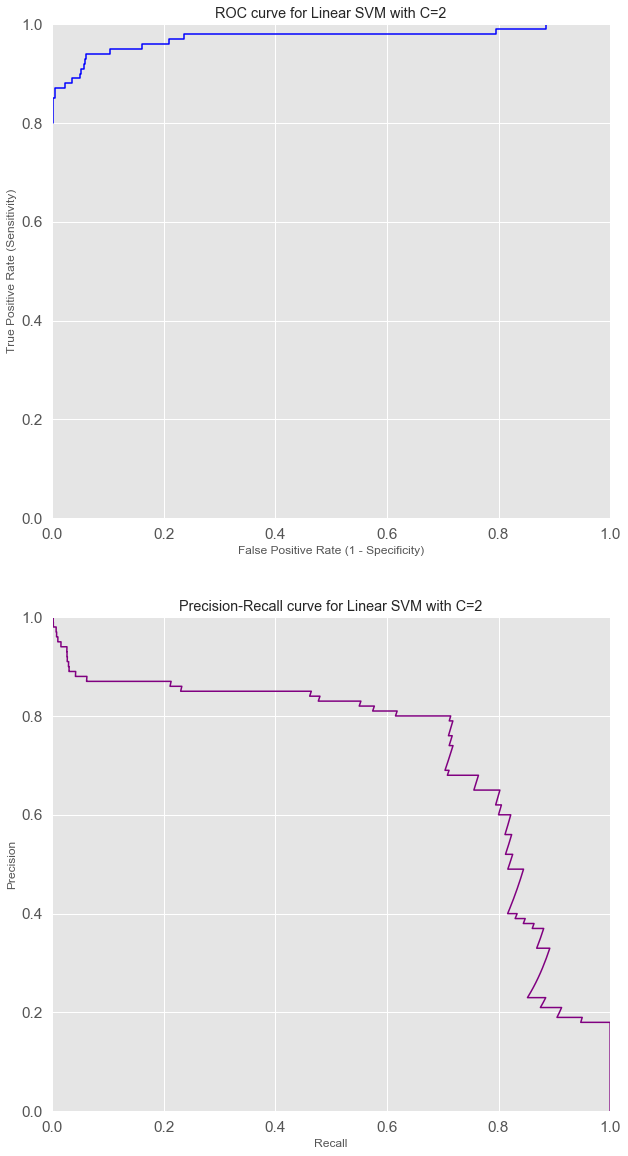

In [47]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear2', 'Linear SVM with C=2', 5)

In [48]:
results['final']

{'accuracy': 0.9819035351885613,
 'sensitivity': 0.8984897959183673,
 'specificity': 0.982048080474122,
 'precision': 0.07993256077219595,
 'f1': 0.1467692968986059,
 'auc': 0.9812992904176777,
 'pr_auc': 0.7201142544636184,
 'actual_accuracy': 0.9097560975609754}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55840  1023]
 [    6    92]]


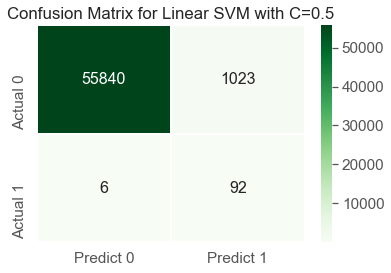

AUC value is: 0.9925678869405772
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55713  1150]
 [   10    88]]


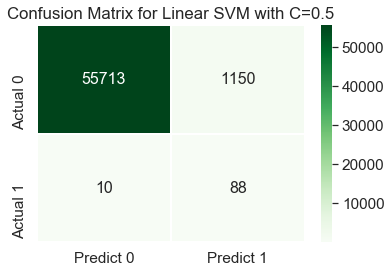

AUC value is: 0.9803844686494966
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55914   949]
 [   12    86]]


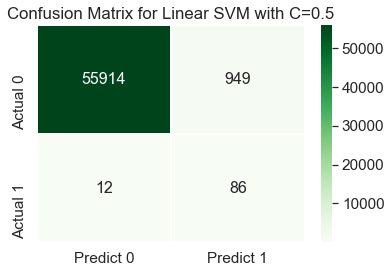

AUC value is: 0.9739386143638469
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55852  1011]
 [    9    89]]


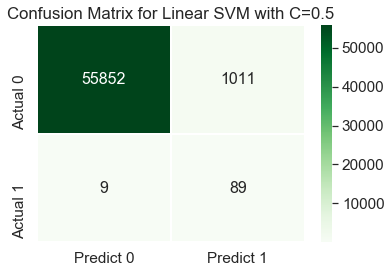

AUC value is: 0.9867872548664225
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55819  1044]
 [   13    87]]


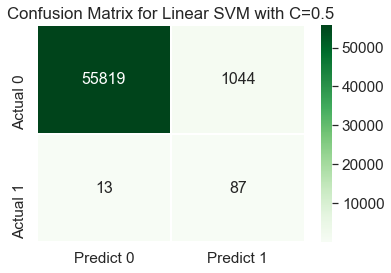

AUC value is: 0.9722230624483408
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9816472221759078, 'sensitivity': 0.8984897959183673, 'specificity': 0.9817913230044141, 'precision': 0.07890351139745269, 'f1': 0.14503307456165568, 'auc': 0.9811802574537367, 'pr_auc': 0.7208030280777267, 'actual_accuracy': 0.9097560975609754}


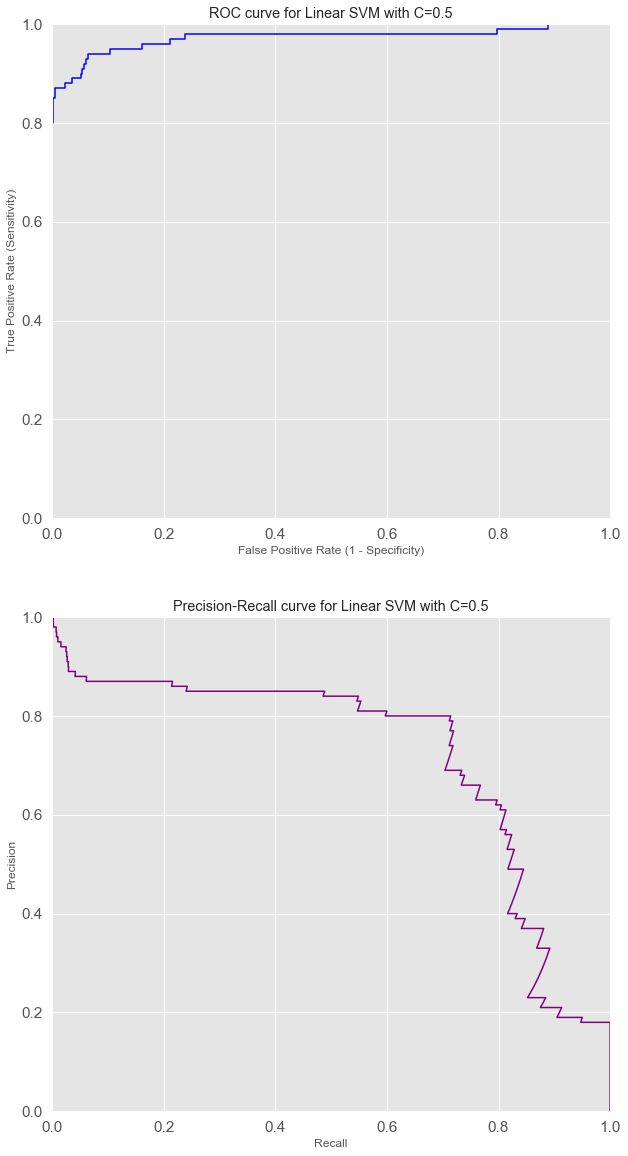

In [49]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear0.5', 'Linear SVM with C=0.5', 5)

In [50]:
results['final']

{'accuracy': 0.9816472221759078,
 'sensitivity': 0.8984897959183673,
 'specificity': 0.9817913230044141,
 'precision': 0.07890351139745269,
 'f1': 0.14503307456165568,
 'auc': 0.9811802574537367,
 'pr_auc': 0.7208030280777267,
 'actual_accuracy': 0.9097560975609754}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55835  1028]
 [    7    91]]


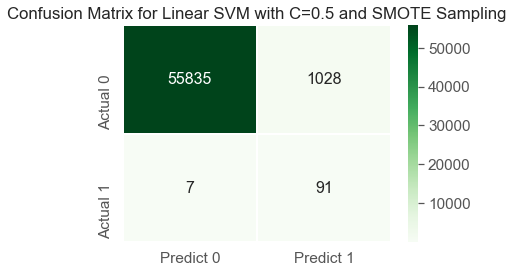

AUC value is: 0.9920047719420146
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55577  1286]
 [   10    88]]


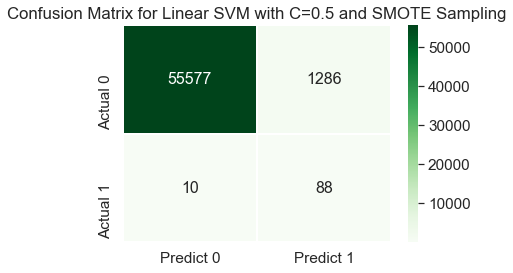

AUC value is: 0.9770829422812509
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55866   997]
 [   11    87]]


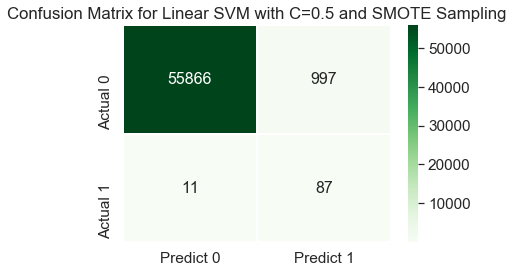

AUC value is: 0.9712775460675802
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55776  1087]
 [    9    89]]


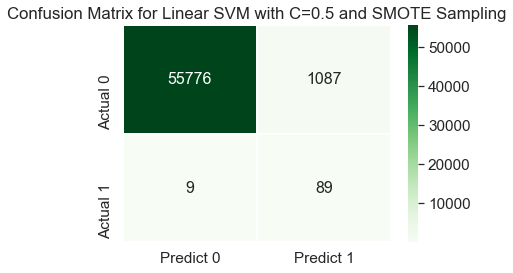

AUC value is: 0.9860274623540217
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55711  1152]
 [   13    87]]


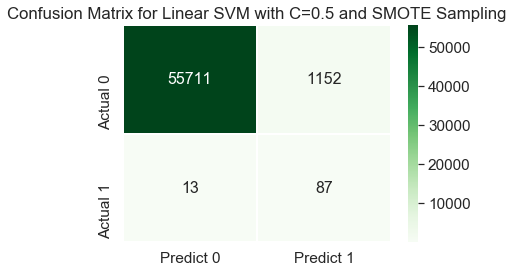

AUC value is: 0.9728519423878443
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9803375674715842, 'sensitivity': 0.8984897959183673, 'specificity': 0.9804793978509752, 'precision': 0.07430513623411596, 'f1': 0.13719731117066886, 'auc': 0.9798489330065424, 'pr_auc': 0.7104730757077775, 'actual_accuracy': 0.9113821138211383}


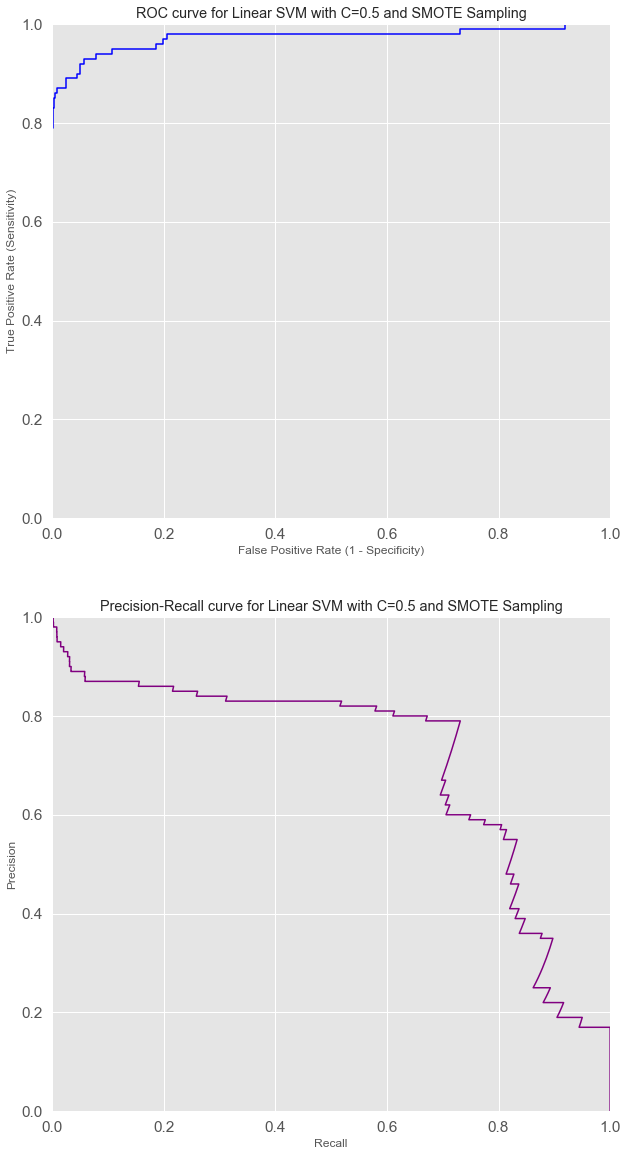

In [51]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'SVM_Linear0.5', 'Linear SVM with C=0.5 and SMOTE Sampling', 5)

In [52]:
results['final']

{'accuracy': 0.9803375674715842,
 'sensitivity': 0.8984897959183673,
 'specificity': 0.9804793978509752,
 'precision': 0.07430513623411596,
 'f1': 0.13719731117066886,
 'auc': 0.9798489330065424,
 'pr_auc': 0.7104730757077775,
 'actual_accuracy': 0.9113821138211383}

### Turns out that SVM has very good AUC values, like logistic regression, although the precision and f1 scores are lower
### This means these models can detect more fraud cases (recall higher) which is very valuable for fraud detection

# SVM was confirmed to have the highest AUC value with C=0.5 and naive sampling
## Previously, we have confirmed that V24 can be removed during forward selection as it was above significance level
## Hence we run a new model of SVM with feature V24 removed
### We try both naive and smote sampling

In [53]:
varlist2 = []
for col in varlist:
    if col != 'V24':
        varlist2.append(col)
print(varlist2)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55838  1025]
 [    6    92]]


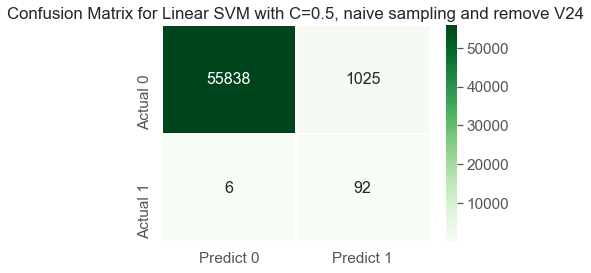

AUC value is: 0.9930586834737413
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55708  1155]
 [   10    88]]


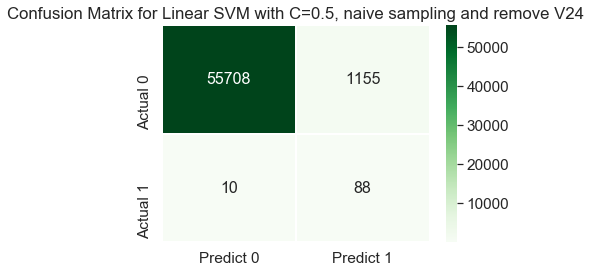

AUC value is: 0.9803841097489239
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55919   944]
 [   11    87]]


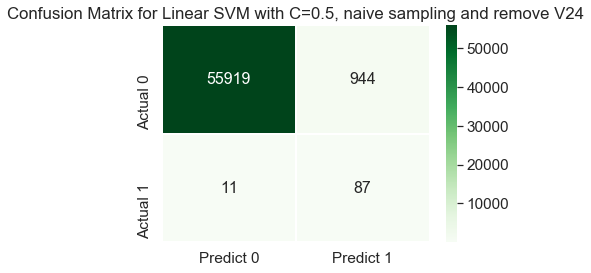

AUC value is: 0.973480836683371
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55845  1018]
 [    9    89]]


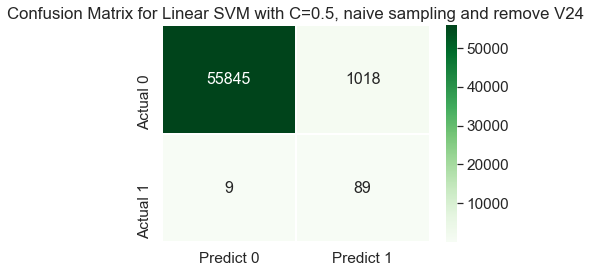

AUC value is: 0.98659865261547
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55823  1040]
 [   13    87]]


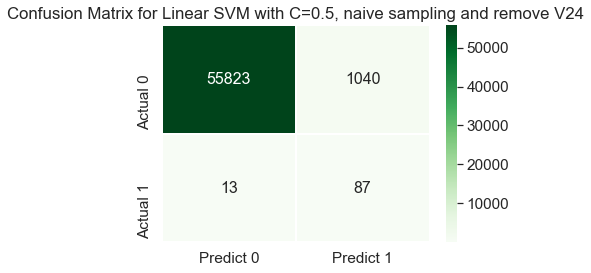

AUC value is: 0.9723055413889523
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9816331769855424, 'sensitivity': 0.9005306122448979, 'specificity': 0.981773736876352, 'precision': 0.07902751867029113, 'f1': 0.14526629817994746, 'auc': 0.9811655647820917, 'pr_auc': 0.7209496546686622, 'actual_accuracy': 0.9101626016260163}


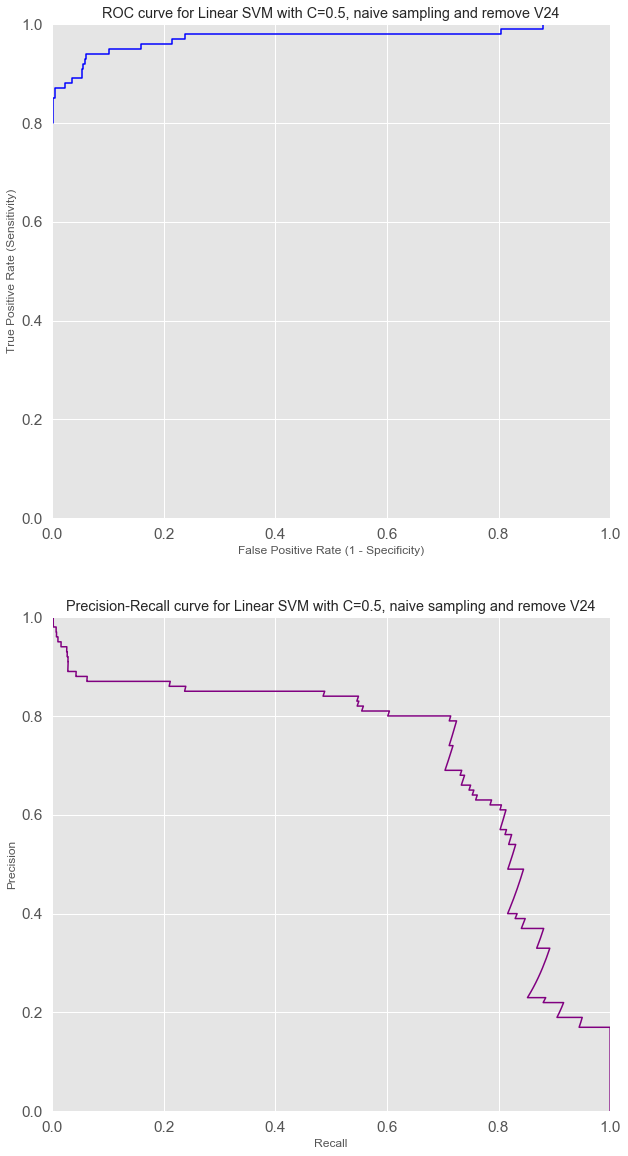

In [54]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist2, 'Class', True, 'naive', 'SVM_Linear0.5', 'Linear SVM with C=0.5, naive sampling and remove V24', 5)

In [55]:
results['final']

{'accuracy': 0.9816331769855424,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.981773736876352,
 'precision': 0.07902751867029113,
 'f1': 0.14526629817994746,
 'auc': 0.9811655647820917,
 'pr_auc': 0.7209496546686622,
 'actual_accuracy': 0.9101626016260163}

In [56]:
print(varlist2)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55802  1061]
 [    7    91]]


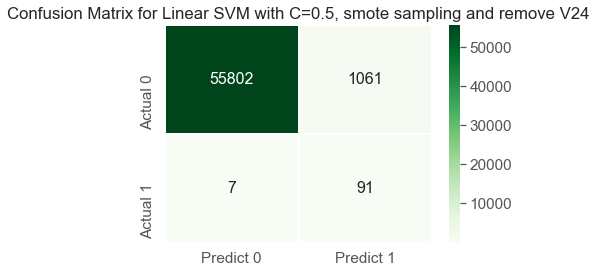

AUC value is: 0.9920361757421257
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55575  1288]
 [   10    88]]


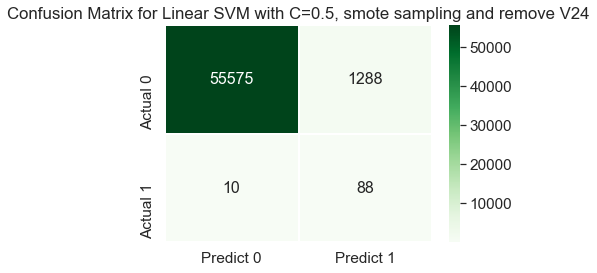

AUC value is: 0.9775534609320577
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55855  1008]
 [   10    88]]


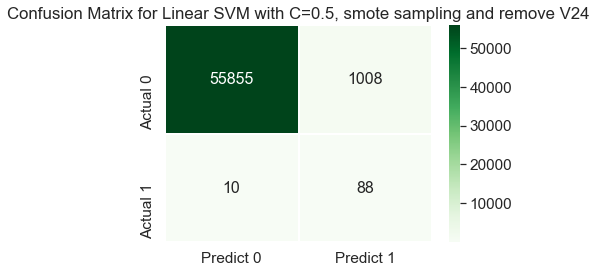

AUC value is: 0.9732215310195972
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55771  1092]
 [    9    89]]


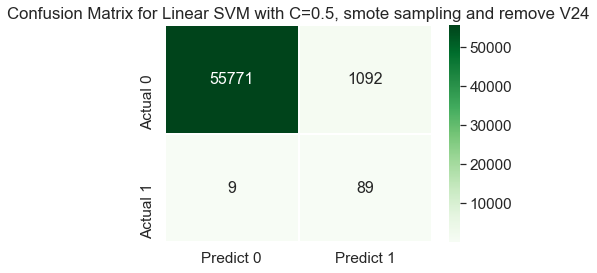

AUC value is: 0.9857688744913929
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55700  1163]
 [   13    87]]


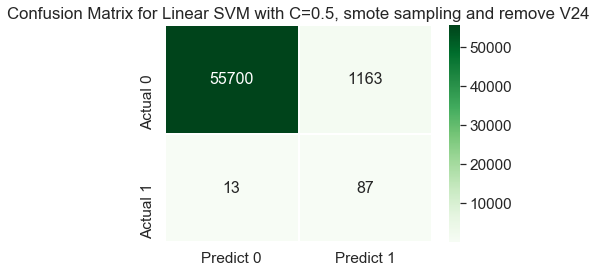

AUC value is: 0.9725158714805762
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9801233871946075, 'sensitivity': 0.9005306122448979, 'specificity': 0.9802613298630041, 'precision': 0.07363967585043203, 'f1': 0.13609335731542882, 'auc': 0.9802191827331498, 'pr_auc': 0.7131738821815545, 'actual_accuracy': 0.9121951219512197}


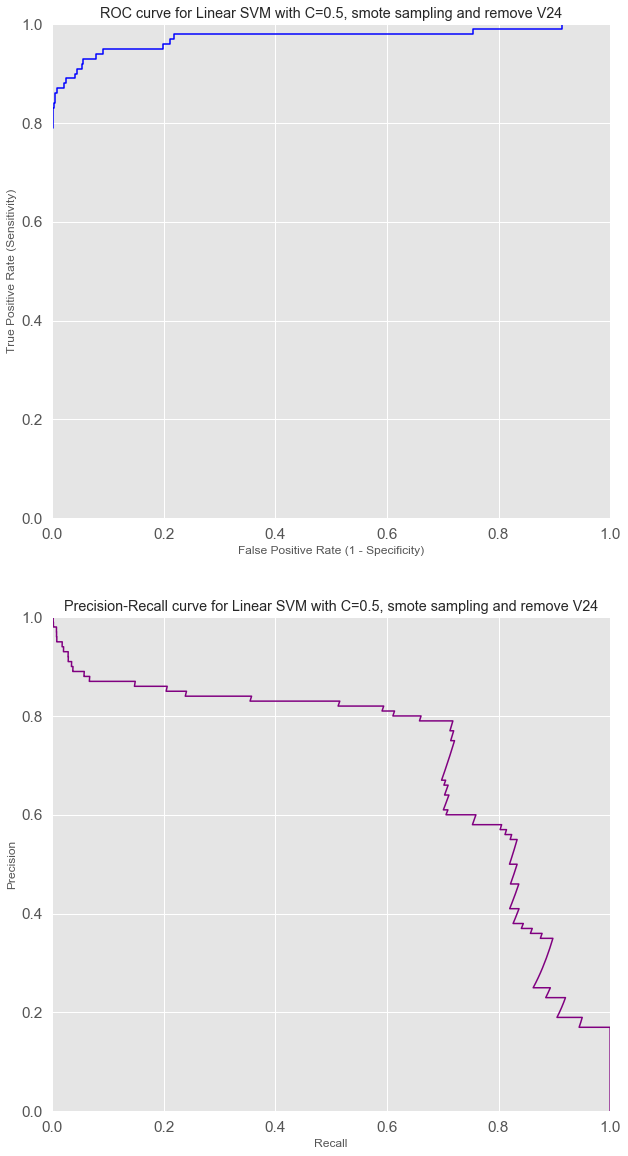

In [57]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist2, 'Class', True, 'smote', 'SVM_Linear0.5', 'Linear SVM with C=0.5, smote sampling and remove V24', 5)

In [58]:
results

{'accuracy': [0.9812503291725918,
  0.9772124787135057,
  0.982128122750654,
  0.9806709854110708,
  0.9793550199252146],
 'actual_accuracy': [0.9085365853658537,
  0.9146341463414634,
  0.9146341463414634,
  0.9085365853658537,
  0.9146341463414634],
 'sensitivity': [0.9285714285714286,
  0.8979591836734694,
  0.8979591836734694,
  0.9081632653061225,
  0.87],
 'specificity': [0.9813411181260222,
  0.9773490670559063,
  0.982273182913318,
  0.9807959481560945,
  0.9795473330636794],
 'precision': [0.07899305555555555,
  0.06395348837209303,
  0.08029197080291971,
  0.07535986452159187,
  0.0696],
 'f1': [0.1456,
  0.11940298507462686,
  0.14740368509212728,
  0.13917122752150116,
  0.1288888888888889],
 'auc': [0.9920361757421257,
  0.9775534609320577,
  0.9732215310195972,
  0.9857688744913929,
  0.9725158714805762],
 'pr_auc': [0.6512721239352203,
  0.7939891227424168,
  0.7151974193275865,
  0.6965733733363062,
  0.7088373715662428],
 'final': {'accuracy': 0.9801233871946075,
  'se

In [59]:
results['final']

{'accuracy': 0.9801233871946075,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9802613298630041,
 'precision': 0.07363967585043203,
 'f1': 0.13609335731542882,
 'auc': 0.9802191827331498,
 'pr_auc': 0.7131738821815545,
 'actual_accuracy': 0.9121951219512197}

## Next, we try Random Forest for the pipeline, CV 5 fold. We try some tuning with different tree depth, and naive/smote sampling

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[56759   104]
 [   14    84]]


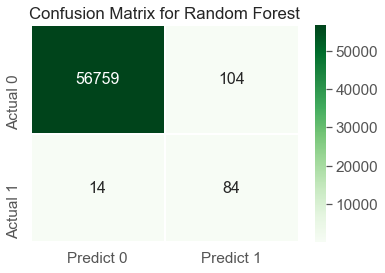

AUC value is: 0.9870768876285896
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[56755   108]
 [   10    88]]


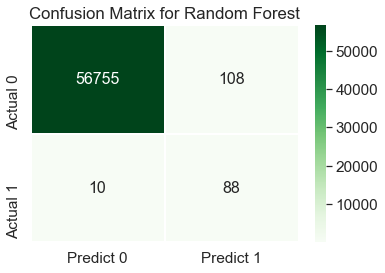

AUC value is: 0.9808983245444565
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[56764    99]
 [   16    82]]


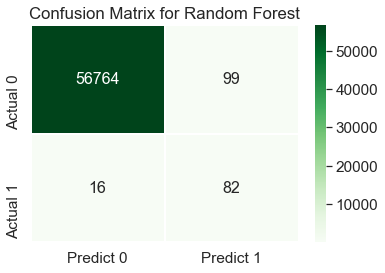

AUC value is: 0.9802986016874787
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[56789    74]
 [   15    83]]


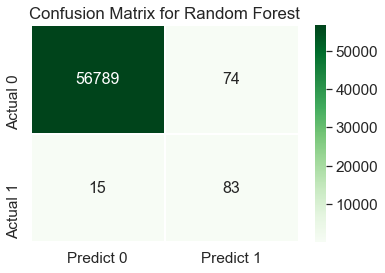

AUC value is: 0.991321784152171
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[56727   136]
 [   14    86]]


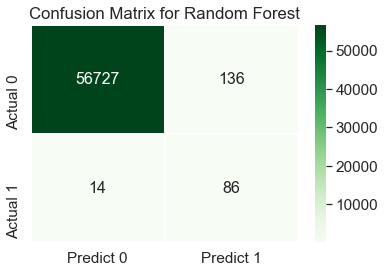

AUC value is: 0.9748296783497177
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9979284256476415, 'sensitivity': 0.8597551020408163, 'specificity': 0.9981675254559205, 'precision': 0.45297531685554693, 'f1': 0.5918015092213355, 'auc': 0.9828850552724827, 'pr_auc': 0.7585539612669514, 'actual_accuracy': 0.9227642276422765}


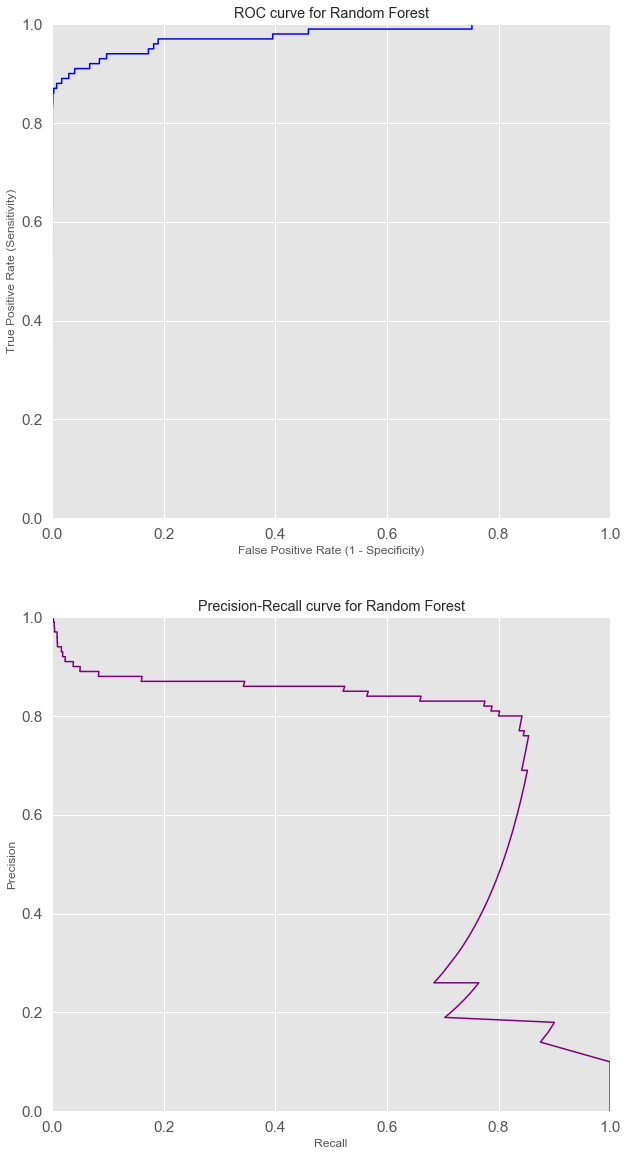

In [60]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'naive', 'RandomForest', 'Random Forest', 5)

In [61]:
results['final']

{'accuracy': 0.9979284256476415,
 'sensitivity': 0.8597551020408163,
 'specificity': 0.9981675254559205,
 'precision': 0.45297531685554693,
 'f1': 0.5918015092213355,
 'auc': 0.9828850552724827,
 'pr_auc': 0.7585539612669514,
 'actual_accuracy': 0.9227642276422765}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56651   212]
 [   13    85]]


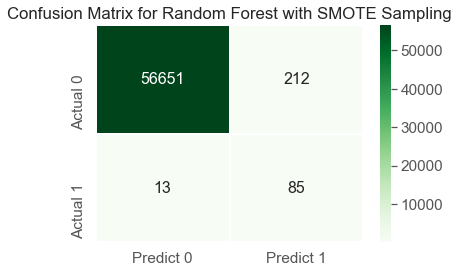

AUC value is: 0.9873675970924747
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56635   228]
 [   10    88]]


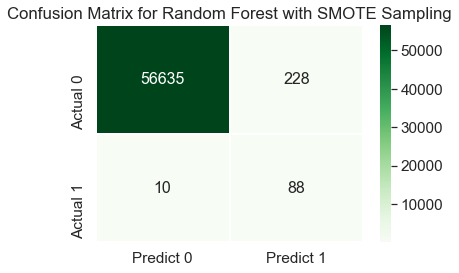

AUC value is: 0.9792484586117653
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56658   205]
 [   15    83]]


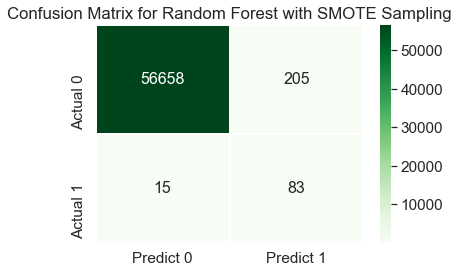

AUC value is: 0.9806134472148776
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56702   161]
 [   12    86]]


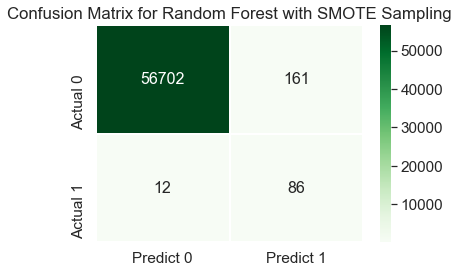

AUC value is: 0.9899037679894426
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56608   255]
 [   13    87]]


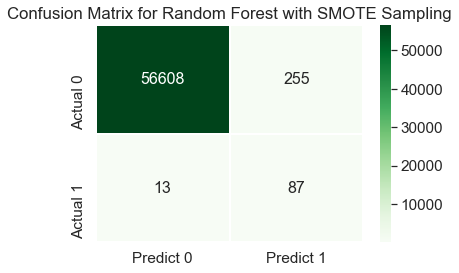

AUC value is: 0.975719184707103
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.996053473111837, 'sensitivity': 0.8719591836734694, 'specificity': 0.9962682236252043, 'precision': 0.2910869691724122, 'f1': 0.43555364325250545, 'auc': 0.9825704911231327, 'pr_auc': 0.7314811054491809, 'actual_accuracy': 0.902439024390244}


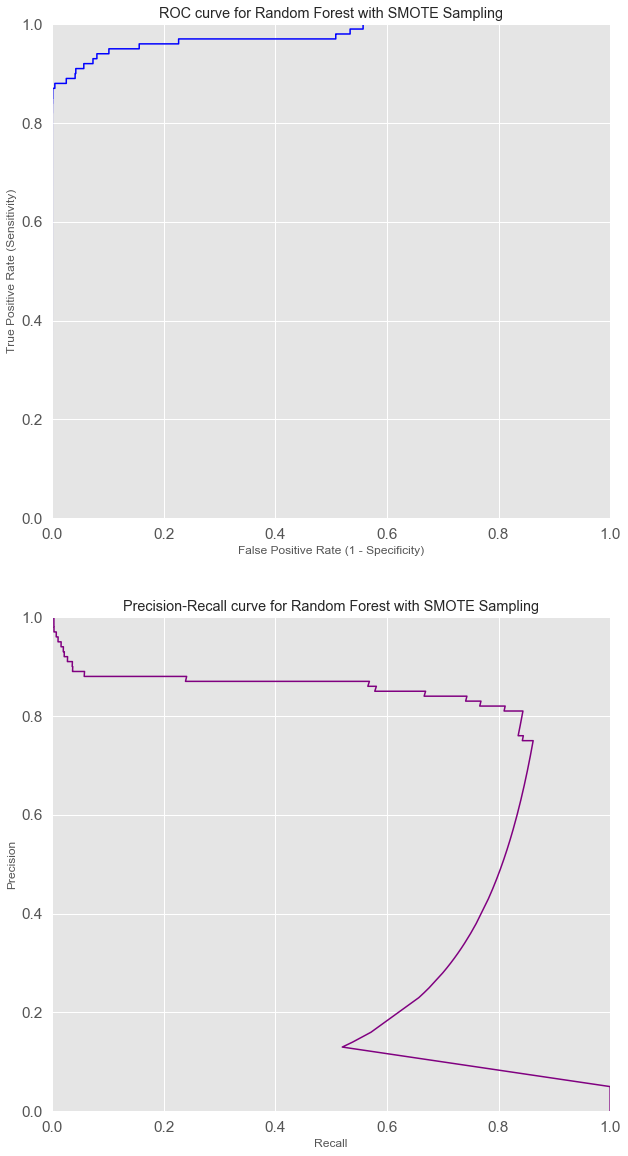

In [62]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForest', 'Random Forest with SMOTE Sampling', 5)

In [63]:
results['final']

{'accuracy': 0.996053473111837,
 'sensitivity': 0.8719591836734694,
 'specificity': 0.9962682236252043,
 'precision': 0.2910869691724122,
 'f1': 0.43555364325250545,
 'auc': 0.9825704911231327,
 'pr_auc': 0.7314811054491809,
 'actual_accuracy': 0.902439024390244}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56607   256]
 [   13    85]]


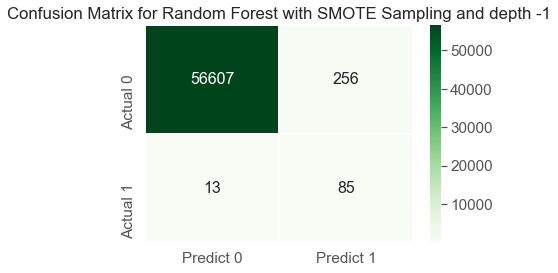

AUC value is: 0.9858897342592491
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56617   246]
 [   10    88]]


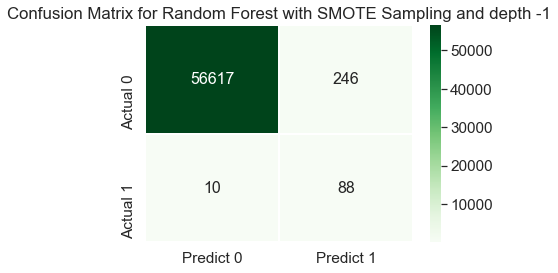

AUC value is: 0.9756222169503717
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56610   253]
 [   15    83]]


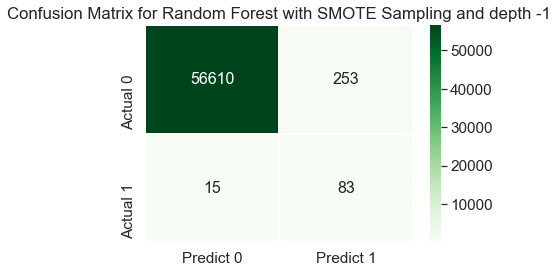

AUC value is: 0.9807888598697837
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56649   214]
 [   12    86]]


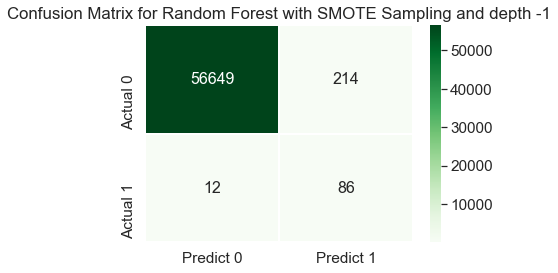

AUC value is: 0.9862960097075426
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56616   247]
 [   13    87]]


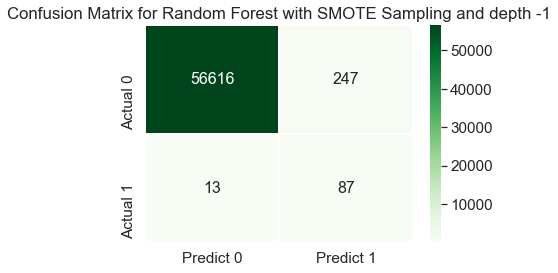

AUC value is: 0.9686587060126972
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9955092401072057, 'sensitivity': 0.8719591836734694, 'specificity': 0.9957230536552768, 'precision': 0.2613818868337895, 'f1': 0.4020444170878908, 'auc': 0.9794511053599289, 'pr_auc': 0.7226306271232437, 'actual_accuracy': 0.8894308943089431}


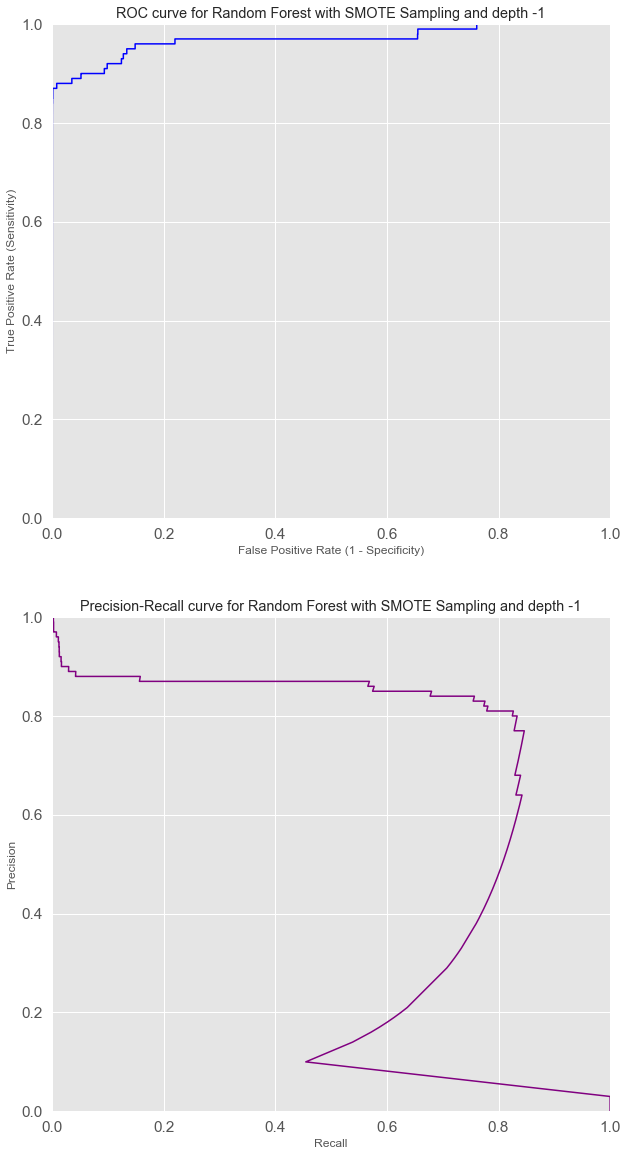

In [64]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForestminus1', 'Random Forest with SMOTE Sampling and depth -1', 5)

In [65]:
results['final']

{'accuracy': 0.9955092401072057,
 'sensitivity': 0.8719591836734694,
 'specificity': 0.9957230536552768,
 'precision': 0.2613818868337895,
 'f1': 0.4020444170878908,
 'auc': 0.9794511053599289,
 'pr_auc': 0.7226306271232437,
 'actual_accuracy': 0.8894308943089431}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56577   286]
 [   13    85]]


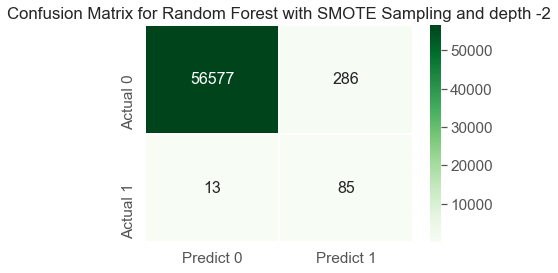

AUC value is: 0.9828284020992812
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56561   302]
 [   10    88]]


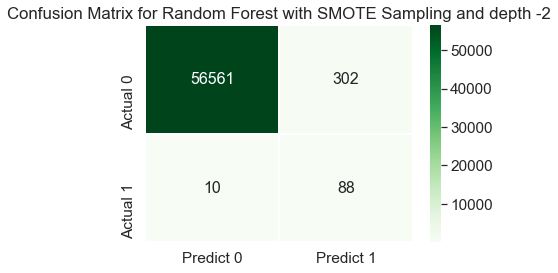

AUC value is: 0.9735553085522057
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56573   290]
 [   15    83]]


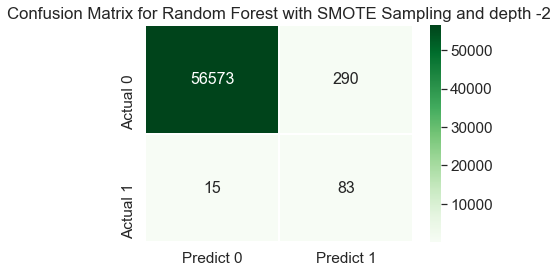

AUC value is: 0.9762985650796203
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56604   259]
 [   12    86]]


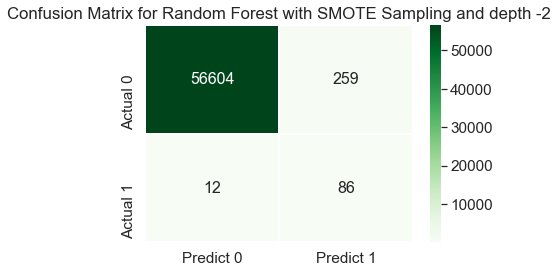

AUC value is: 0.9868667513432751
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56572   291]
 [   13    87]]


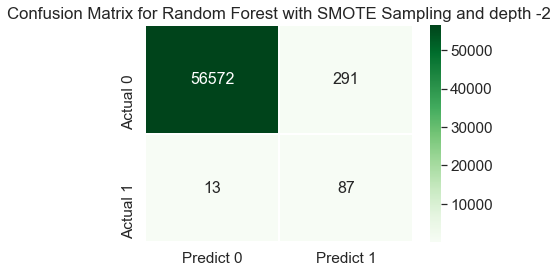

AUC value is: 0.9645257021261628
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9947648765772902, 'sensitivity': 0.8719591836734694, 'specificity': 0.99497740182544, 'precision': 0.23134114749731646, 'f1': 0.36556985725169555, 'auc': 0.9768149458401091, 'pr_auc': 0.7165060264554396, 'actual_accuracy': 0.8817073170731706}


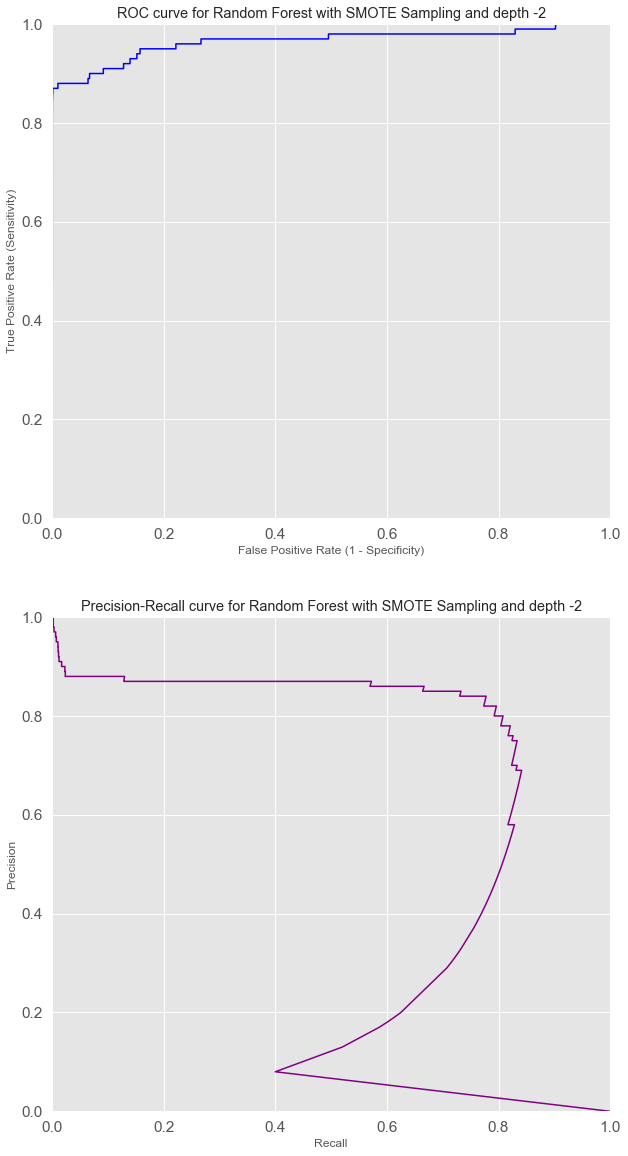

In [66]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForestminus2', 'Random Forest with SMOTE Sampling and depth -2', 5)

In [67]:
results['final']

{'accuracy': 0.9947648765772902,
 'sensitivity': 0.8719591836734694,
 'specificity': 0.99497740182544,
 'precision': 0.23134114749731646,
 'f1': 0.36556985725169555,
 'auc': 0.9768149458401091,
 'pr_auc': 0.7165060264554396,
 'actual_accuracy': 0.8817073170731706}

In [18]:
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[56825    38]
 [   15    83]]


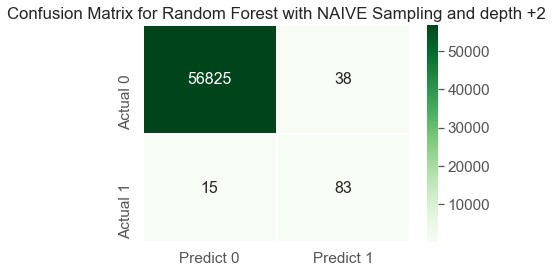

AUC value is: 0.9872276258691226
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[56804    59]
 [   12    86]]


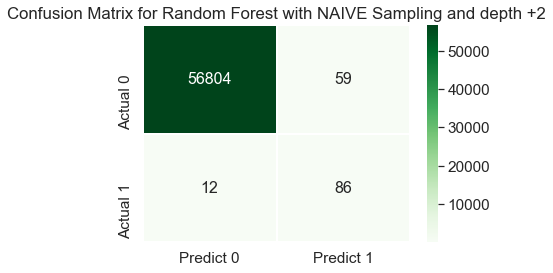

AUC value is: 0.9816454658116698
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[56819    44]
 [   16    82]]


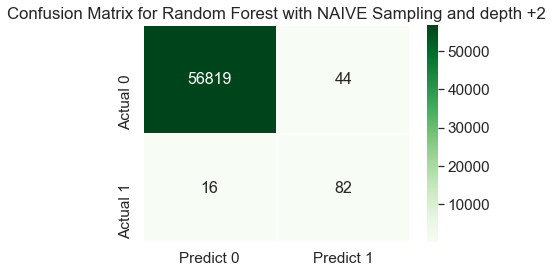

AUC value is: 0.9773260974192537
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[56831    32]
 [   17    81]]


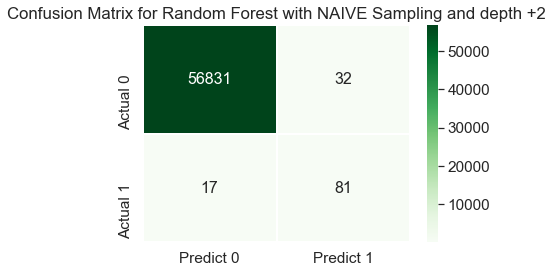

AUC value is: 0.9860734016273269
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[56804    59]
 [   15    85]]


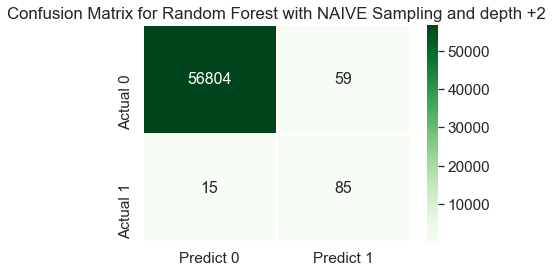

AUC value is: 0.9802156938606826
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9989220786087947, 'sensitivity': 0.8475510204081633, 'specificity': 0.9991840036579147, 'precision': 0.6473878898724933, 'f1': 0.732489295617534, 'auc': 0.9824976569176112, 'pr_auc': 0.7921929713884556, 'actual_accuracy': 0.947560975609756}


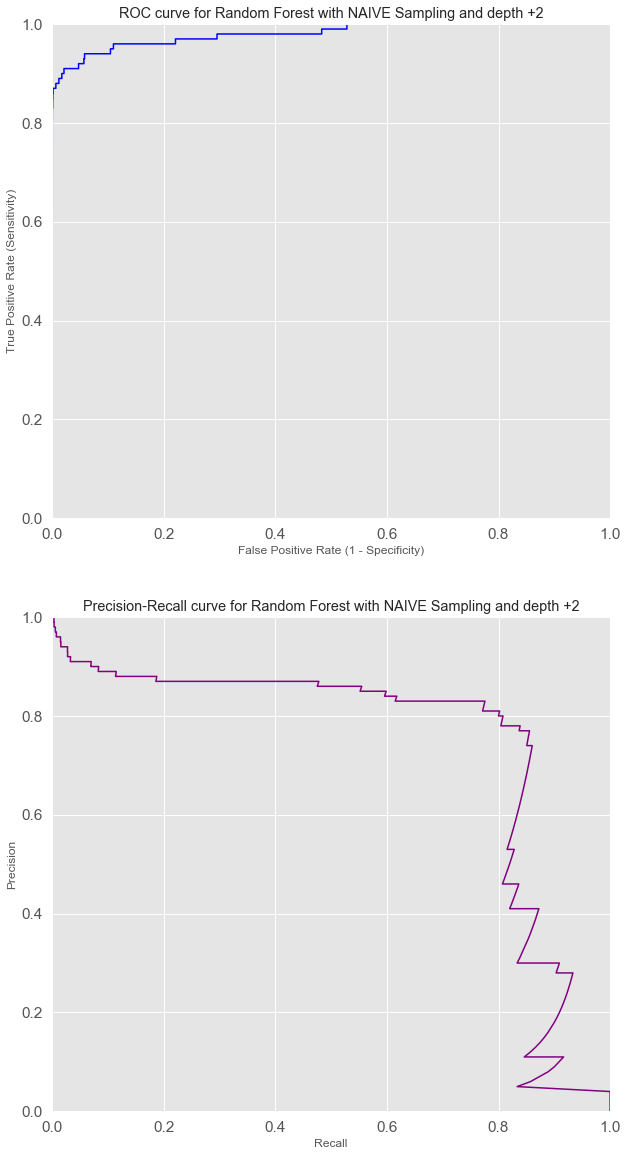

In [21]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'naive', 'RandomForestplus2', 'Random Forest with NAIVE Sampling and depth +2', 5)

In [22]:
results['final']

{'accuracy': 0.9989220786087947,
 'sensitivity': 0.8475510204081633,
 'specificity': 0.9991840036579147,
 'precision': 0.6473878898724933,
 'f1': 0.732489295617534,
 'auc': 0.9824976569176112,
 'pr_auc': 0.7921929713884556,
 'actual_accuracy': 0.947560975609756}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[56842    21]
 [   17    81]]


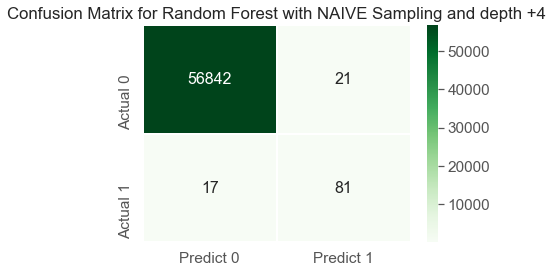

AUC value is: 0.9817380621594258
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[56833    30]
 [   13    85]]


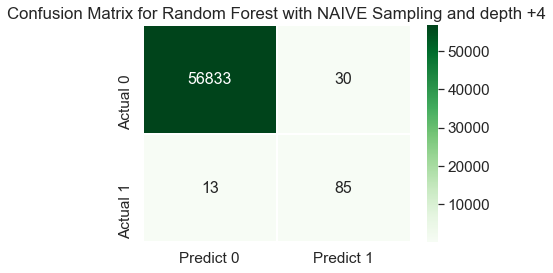

AUC value is: 0.9814904207642643
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[56838    25]
 [   18    80]]


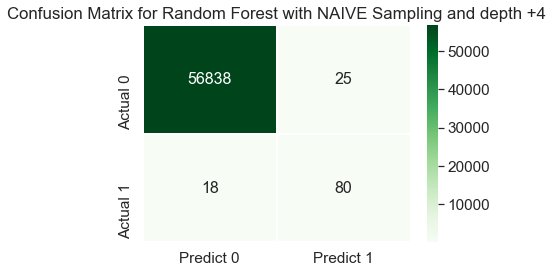

AUC value is: 0.9686924749675823
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[56849    14]
 [   19    79]]


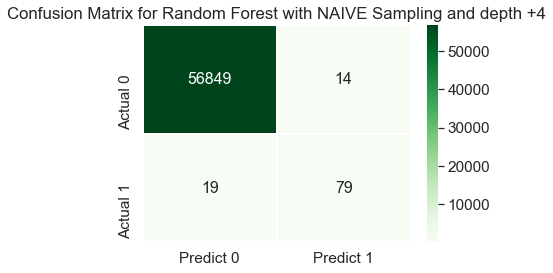

AUC value is: 0.9872130903959284
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[56830    33]
 [   16    84]]


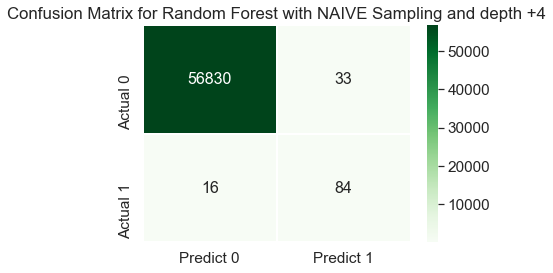

AUC value is: 0.9839508995304503
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9992767041323537, 'sensitivity': 0.831265306122449, 'specificity': 0.9995673812496703, 'precision': 0.772512785457262, 'f1': 0.7995436169812653, 'auc': 0.9806169895635302, 'pr_auc': 0.8197670215949406, 'actual_accuracy': 0.9601626016260161}


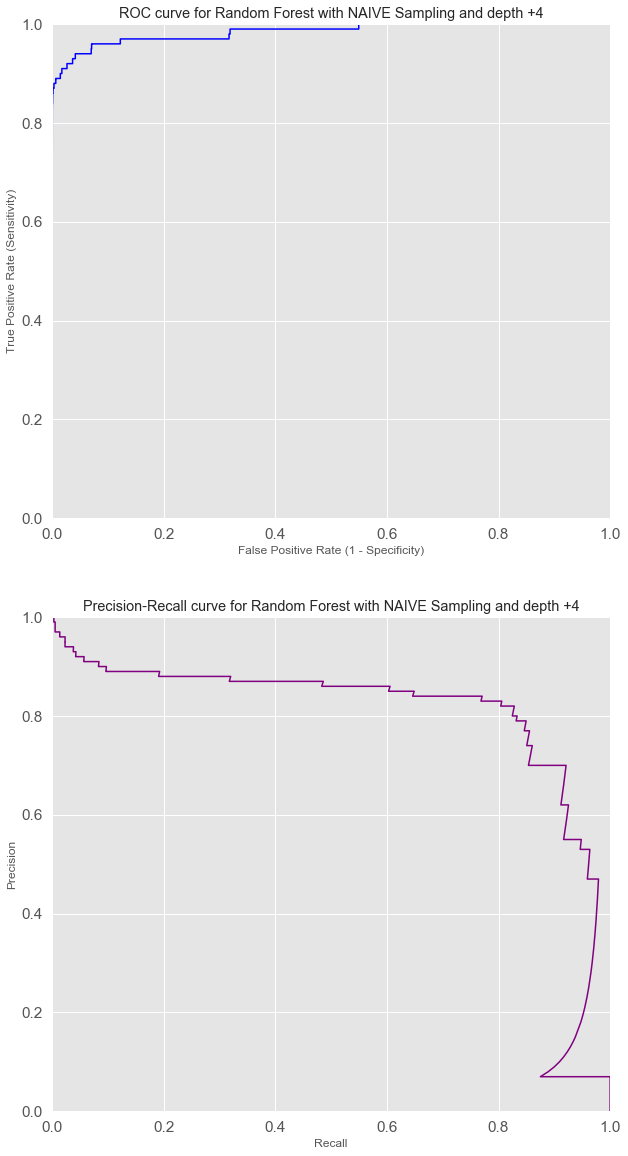

In [23]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'naive', 'RandomForestplus4', 'Random Forest with NAIVE Sampling and depth +4', 5)

In [24]:
results['final']

{'accuracy': 0.9992767041323537,
 'sensitivity': 0.831265306122449,
 'specificity': 0.9995673812496703,
 'precision': 0.772512785457262,
 'f1': 0.7995436169812653,
 'auc': 0.9806169895635302,
 'pr_auc': 0.8197670215949406,
 'actual_accuracy': 0.9601626016260161}

# Random Forest

### Sampling types:
naive,smote,smote,smote

### Depth:
sqrt(num of features), sqrt(num of features), sqrt(num of features)-1, sqrt(num of features)-2

sensitivity: 0.8598, 0.8740, 0.8740, 0.8720 <br>
precision: 0.4530, 0.2907, 0.2536, 0.2295 <br>
f1: 0.5918, 0.4348, 0.3930, 0.3633 <br>
auc: 0.9290, 0.9351, 0.9348, 0.9334

### Best model is SMOTE sampling with tree depth = sqrt(num of features)
### As number of features/depth decrease, all metrics worsen
## Likely that there is still more room for improvement in sensitivity/auc if we increase depth (possible current underfitting)



## Random Forest has slightly lower AUC (0.9290, 0.9351) than Logistic Regression or SVC but the f1 values (0.5918, 0.4348) and precision (0.4530, 0.2907) is a lot better
### It is a great model in terms of balancing both AUC and f1/precision
### There are lesser False Positive while still keeping a large proportion of right guesses of fraud (True Positive)

# Now, we try to use XGBoost with various depths and sampling (naive, smote) to find it's results

In [6]:
varlist = list(df.columns.values)
varlist.remove('Time')
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.023955	validation_1-error:0.021383
[5]	validation_0-error:0.012334	validation_1-error:0.007725
[10]	validation_0-error:0.008184	validation_1-error:0.004494
[15]	validation_0-error:0.006454	validation_1-error:0.003336
[20]	validation_0-error:0.001068	validation_1-error:0.002826
[25]	validation_0-error:0.000835	validation_1-error:0.002142
[30]	validation_0-error:0.00067	validation_1-error:0.001826
[35]	validation_0-error:0.000646	validation_1-error:0.001668
[40]	validation_0-error:0.000561	validation_1-error:0.001545
[45]	validation_0-error:0.000477	validation_1-error:0.001404
[50]	validation_0-error:0.000422	validation_1-error:0.001282
[55]	validation_0-error:0.000352	validation_1-e

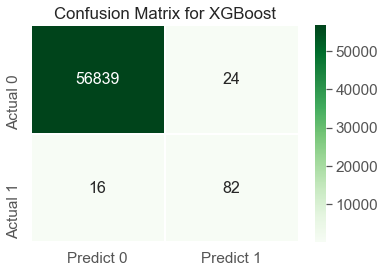

AUC value is: 0.9897636173158042
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.030855	validation_1-error:0.016345
[5]	validation_0-error:0.025276	validation_1-error:0.007426
[10]	validation_0-error:0.00858	validation_1-error:0.004793
[15]	validation_0-error:0.004445	validation_1-error:0.003933
[20]	validation_0-error:0.001633	validation_1-error:0.003371
[25]	validation_0-error:0.001499	validation_1-error:0.00309
[30]	validation_0-error:0.001238	validation_1-error:0.002668
[35]	validation_0-error:0.001172	validation_1-error:0.002546
[40]	validation_0-error:0.001071	validation_1-error:0.00251
[45]	validation_0-error:0.000866	validatio

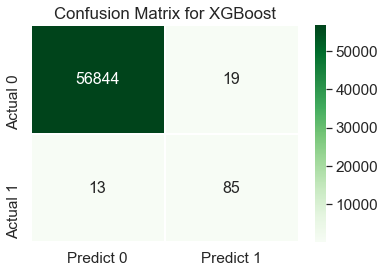

AUC value is: 0.979409784419193
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.022965	validation_1-error:0.027545
[5]	validation_0-error:0.009769	validation_1-error:0.006952
[10]	validation_0-error:0.005412	validation_1-error:0.006004
[15]	validation_0-error:0.003834	validation_1-error:0.005232
[20]	validation_0-error:0.002091	validation_1-error:0.004442
[25]	validation_0-error:0.001679	validation_1-error:0.00381
[30]	validation_0-error:0.001376	validation_1-error:0.003371
[35]	validation_0-error:0.001097	validation_1-error:0.002826
[40]	validation_0-error:0.000947	validation_1-error:0.002352
[45]	validation_0-error:0.000789	vali

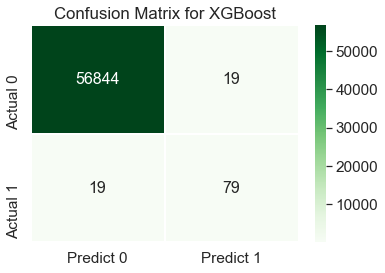

AUC value is: 0.9611256844682547
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.029776	validation_1-error:0.00718
[5]	validation_0-error:0.013807	validation_1-error:0.003336
[10]	validation_0-error:0.006727	validation_1-error:0.004055
[15]	validation_0-error:0.002796	validation_1-error:0.003827
[20]	validation_0-error:0.001321	validation_1-error:0.003494
[25]	validation_0-error:0.001121	validation_1-error:0.00323
[30]	validation_0-error:0.000868	validation_1-error:0.002686
[35]	validation_0-error:0.000723	validation_1-error:0.002212
[40]	validation_0-error:0.000605	validation_1-error:0.002054
[45]	validation_0-error:0.000554	vali

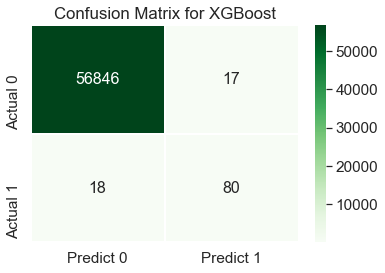

AUC value is: 0.9841529246628219
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.023908	validation_1-error:0.010621
[5]	validation_0-error:0.018558	validation_1-error:0.007795
[10]	validation_0-error:0.009719	validation_1-error:0.005425
[15]	validation_0-error:0.0029	validation_1-error:0.004108
[20]	validation_0-error:0.001372	validation_1-error:0.003599
[25]	validation_0-error:0.001038	validation_1-error:0.002774
[30]	validation_0-error:0.000785	validation_1-error:0.002405
[35]	validation_0-error:0.000666	validation_1-error:0.002036
[40]	validation_0-error:0.000554	validation_1-error:0.001966
[45]	validation_0-error:0.000525	validation_1-error:0.001826
[50]	validation_0-error:0.000486	v

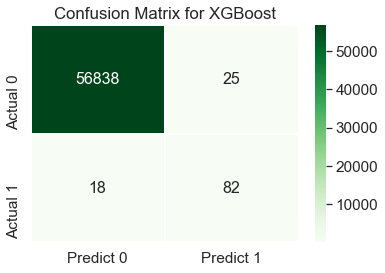

AUC value is: 0.9787336229182421
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9993399045302995, 'sensitivity': 0.8293061224489795, 'specificity': 0.9996342085363066, 'precision': 0.7976224910351628, 'f1': 0.8128823055873342, 'auc': 0.9786371267568633, 'pr_auc': 0.8395228139299723, 'actual_accuracy': 0.9658536585365853}


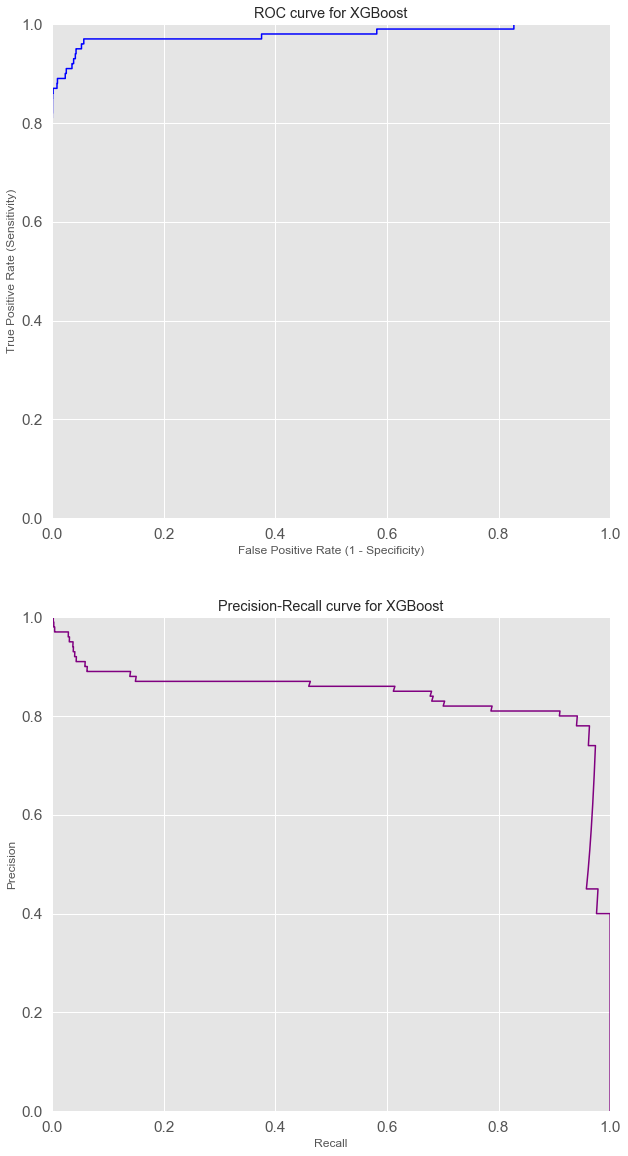

In [68]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoost', 'XGBoost', 5)

In [69]:
results

{'accuracy': [0.9992977651375503,
  0.9994382121100402,
  0.9993328768806727,
  0.9993855444953564,
  0.9992451240278778],
 'actual_accuracy': [0.967479674796748,
  0.9735772357723578,
  0.9613821138211383,
  0.9634146341463414,
  0.9634146341463414],
 'sensitivity': [0.8367346938775511,
  0.8673469387755102,
  0.8061224489795918,
  0.8163265306122449,
  0.82],
 'specificity': [0.9995779329265075,
  0.9996658635668185,
  0.9996658635668185,
  0.9997010358229429,
  0.9995603467984454],
 'precision': [0.7735849056603774,
  0.8173076923076923,
  0.8061224489795918,
  0.8247422680412371,
  0.7663551401869159],
 'f1': [0.803921568627451,
  0.8415841584158416,
  0.806122448979592,
  0.8205128205128205,
  0.7922705314009661],
 'auc': [0.9897636173158042,
  0.979409784419193,
  0.9611256844682547,
  0.9841529246628219,
  0.9787336229182421],
 'pr_auc': [0.8419206037018302,
  0.8701432782748878,
  0.8134080829894111,
  0.8308752044990679,
  0.8412669001846648],
 'final': {'accuracy': 0.99933990

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.035537	validation_1-error:0.019434
[5]	validation_0-error:0.026441	validation_1-error:0.010516
[10]	validation_0-error:0.019485	validation_1-error:0.009498
[15]	validation_0-error:0.016061	validation_1-error:0.007057
[20]	validation_0-error:0.010514	validation_1-error:0.006145
[25]	validation_0-error:0.007461	validation_1-error:0.005425
[30]	validation_0-error:0.004528	validation_1-error:0.004723
[35]	validation_0-error:0.004095	validation_1-error:0.004143
[40]	validation_0-error:0.003915	validation_1-error:0.003494
[45]	validation_0-error:0.002425	validation_1-error:0.002862
[50]	validation_0-error:0.001084	validation_1-error:0.002897
[55]	validation_0-error:0.000963	validation_1-

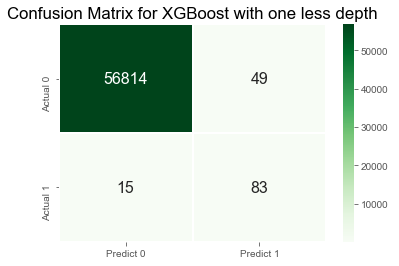

AUC value is: 0.9899468360581662
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.035867	validation_1-error:0.029195
[5]	validation_0-error:0.029987	validation_1-error:0.017064
[10]	validation_0-error:0.021376	validation_1-error:0.00776
[15]	validation_0-error:0.015318	validation_1-error:0.005706
[20]	validation_0-error:0.010266	validation_1-error:0.005618
[25]	validation_0-error:0.002379	validation_1-error:0.005021
[30]	validation_0-error:0.002088	validation_1-error:0.004547
[35]	validation_0-error:0.002016	validation_1-error:0.004301
[40]	validation_0-error:0.001787	validation_1-error:0.003792
[45]	validation_0-error:0.001611	validat

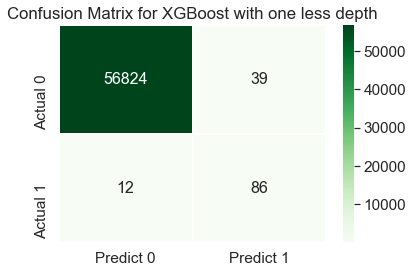

AUC value is: 0.9815648926330993
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.032972	validation_1-error:0.016783
[5]	validation_0-error:0.021134	validation_1-error:0.009006
[10]	validation_0-error:0.013966	validation_1-error:0.01034
[15]	validation_0-error:0.013284	validation_1-error:0.008936
[20]	validation_0-error:0.00843	validation_1-error:0.006619
[25]	validation_0-error:0.006766	validation_1-error:0.005829
[30]	validation_0-error:0.005144	validation_1-error:0.00539
[35]	validation_0-error:0.003555	validation_1-error:0.004828
[40]	validation_0-error:0.003282	validation_1-error:0.004249
[45]	validation_0-error:0.001838	valid

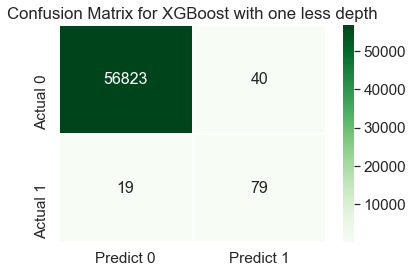

AUC value is: 0.963088421975195
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.036091	validation_1-error:0.010095
[5]	validation_0-error:0.02541	validation_1-error:0.006303
[10]	validation_0-error:0.019367	validation_1-error:0.006864
[15]	validation_0-error:0.015997	validation_1-error:0.00546
[20]	validation_0-error:0.012036	validation_1-error:0.004881
[25]	validation_0-error:0.010523	validation_1-error:0.004512
[30]	validation_0-error:0.00652	validation_1-error:0.004161
[35]	validation_0-error:0.005087	validation_1-error:0.003704
[40]	validation_0-error:0.003803	validation_1-error:0.003564
[45]	validation_0-error:0.002381	valida

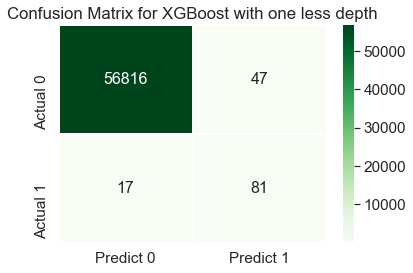

AUC value is: 0.9864565279886817
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.030941	validation_1-error:0.018275
[5]	validation_0-error:0.025284	validation_1-error:0.011727
[10]	validation_0-error:0.021712	validation_1-error:0.009304
[15]	validation_0-error:0.015616	validation_1-error:0.00718
[20]	validation_0-error:0.010048	validation_1-error:0.006039
[25]	validation_0-error:0.005966	validation_1-error:0.005196
[30]	validation_0-error:0.0045	validation_1-error:0.004705
[35]	validation_0-error:0.003229	validation_1-error:0.004477
[40]	validation_0-error:0.003056	validation_1-error:0.00402
[45]	validation_0-error:0.001618	validation_1-error:0.003458
[50]	validation_0-error:0.001468	val

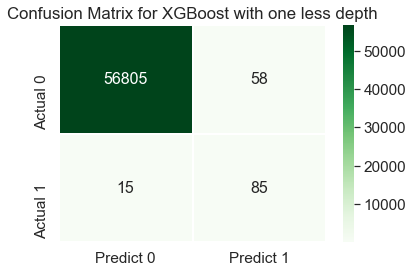

AUC value is: 0.977132669750101
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9989080337882665, 'sensitivity': 0.8414285714285714, 'specificity': 0.9991804864323022, 'precision': 0.6415743038823921, 'f1': 0.7275105629203815, 'auc': 0.9796378696810486, 'pr_auc': 0.8221660597235377, 'actual_accuracy': 0.9682926829268291}


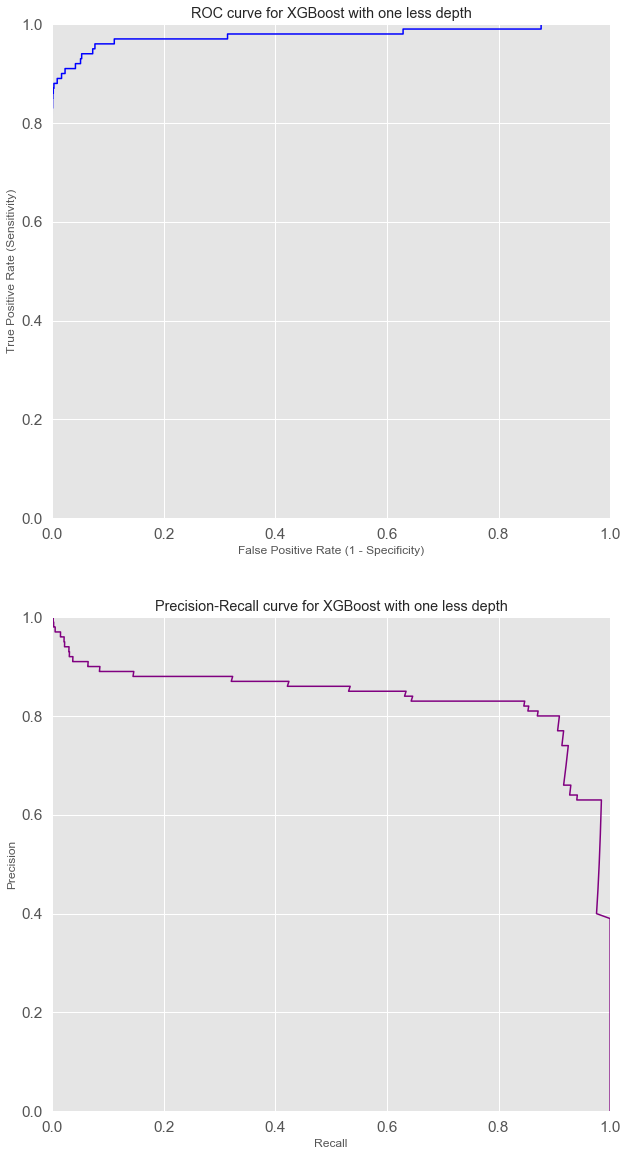

In [6]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostminus1', 'XGBoost with one less depth', 5)

In [7]:
results['final']

{'accuracy': 0.9989080337882665,
 'sensitivity': 0.8414285714285714,
 'specificity': 0.9991804864323022,
 'precision': 0.6415743038823921,
 'f1': 0.7275105629203815,
 'auc': 0.9796378696810486,
 'pr_auc': 0.8221660597235377,
 'actual_accuracy': 0.9682926829268291}

In [8]:
results

{'accuracy': [0.9988764242200804,
  0.9991046505503766,
  0.9989642035778866,
  0.9988764242200804,
  0.9987184663729087],
 'actual_accuracy': [0.9695121951219512,
  0.975609756097561,
  0.9613821138211383,
  0.9654471544715447,
  0.9695121951219512],
 'sensitivity': [0.8469387755102041,
  0.8775510204081632,
  0.8061224489795918,
  0.826530612244898,
  0.85],
 'specificity': [0.999138279724953,
  0.9993141410055748,
  0.9992965548775126,
  0.9991734519810773,
  0.9989800045723933],
 'precision': [0.6287878787878788,
  0.688,
  0.6638655462184874,
  0.6328125,
  0.5944055944055944],
 'f1': [0.7217391304347825,
  0.7713004484304932,
  0.7281105990783411,
  0.7168141592920354,
  0.6995884773662552],
 'auc': [0.9899468360581662,
  0.9815648926330993,
  0.963088421975195,
  0.9864565279886817,
  0.977132669750101],
 'pr_auc': [0.7982129951028172,
  0.8386917890172908,
  0.8113348333814036,
  0.8249526597710303,
  0.8376380213451468],
 'final': {'accuracy': 0.9989080337882665,
  'sensitivit

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.018894	validation_1-error:0.011341
[5]	validation_0-error:0.009791	validation_1-error:0.005425
[10]	validation_0-error:0.00366	validation_1-error:0.002686
[15]	validation_0-error:0.001143	validation_1-error:0.002563
[20]	validation_0-error:0.000703	validation_1-error:0.001949
[25]	validation_0-error:0.000435	validation_1-error:0.00144
[30]	validation_0-error:0.000389	validation_1-error:0.001352
[35]	validation_0-error:0.000306	validation_1-error:0.001229
[40]	validation_0-error:0.00024	validation_1-error:0.001141
[45]	validation_0-error:0.000204	validation_1-error:0.000983
[50]	validation_0-error:0.000152	validation_1-error:0.000878
[55]	validation_0-error:0.000112	validation_1-err

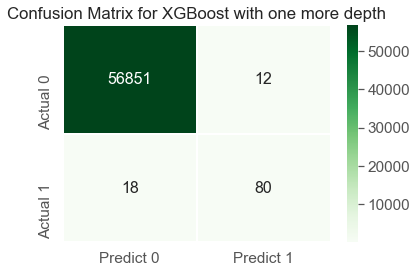

AUC value is: 0.9810724810473579
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.020259	validation_1-error:0.017837
[5]	validation_0-error:0.0088	validation_1-error:0.00481
[10]	validation_0-error:0.004434	validation_1-error:0.003599
[15]	validation_0-error:0.00118	validation_1-error:0.002493
[20]	validation_0-error:0.000769	validation_1-error:0.00158
[25]	validation_0-error:0.000618	validation_1-error:0.001229
[30]	validation_0-error:0.000528	validation_1-error:0.001124
[35]	validation_0-error:0.000466	validation_1-error:0.001018
[40]	validation_0-error:0.00042	validation_1-error:0.000966
[45]	validation_0-error:0.000345	validation_1

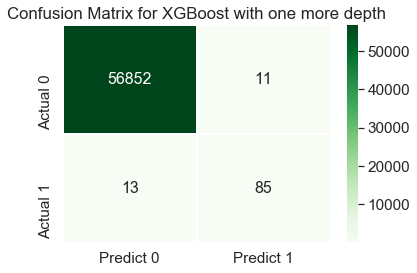

AUC value is: 0.9801376347806239
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.014462	validation_1-error:0.013816
[5]	validation_0-error:0.006931	validation_1-error:0.006654
[10]	validation_0-error:0.002807	validation_1-error:0.003459
[15]	validation_0-error:0.001027	validation_1-error:0.002616
[20]	validation_0-error:0.000976	validation_1-error:0.002352
[25]	validation_0-error:0.000807	validation_1-error:0.001984
[30]	validation_0-error:0.000681	validation_1-error:0.001773
[35]	validation_0-error:0.000508	validation_1-error:0.00144
[40]	validation_0-error:0.000442	validation_1-error:0.001299
[45]	validation_0-error:0.00038	vali

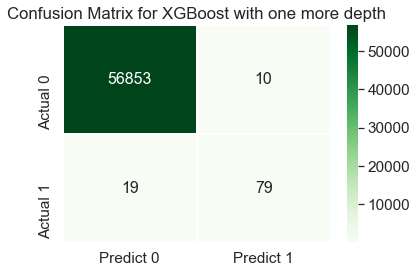

AUC value is: 0.9608046479059766
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.026781	validation_1-error:0.010411
[5]	validation_0-error:0.011053	validation_1-error:0.002967
[10]	validation_0-error:0.002044	validation_1-error:0.002616
[15]	validation_0-error:0.000952	validation_1-error:0.002879
[20]	validation_0-error:0.000701	validation_1-error:0.002317
[25]	validation_0-error:0.000554	validation_1-error:0.002054
[30]	validation_0-error:0.00047	validation_1-error:0.001633
[35]	validation_0-error:0.000457	validation_1-error:0.001527
[40]	validation_0-error:0.000382	validation_1-error:0.001404
[45]	validation_0-error:0.000314	val

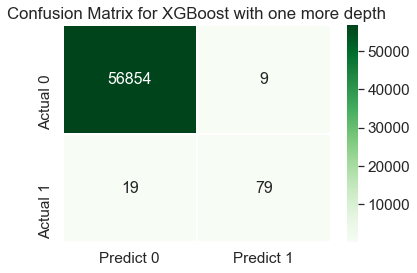

AUC value is: 0.9835591236652936
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.017481	validation_1-error:0.02865
[5]	validation_0-error:0.005634	validation_1-error:0.004652
[10]	validation_0-error:0.002302	validation_1-error:0.00302
[15]	validation_0-error:0.002146	validation_1-error:0.002493
[20]	validation_0-error:0.000673	validation_1-error:0.0023
[25]	validation_0-error:0.000541	validation_1-error:0.00172
[30]	validation_0-error:0.000404	validation_1-error:0.001492
[35]	validation_0-error:0.000325	validation_1-error:0.001246
[40]	validation_0-error:0.00024	validation_1-error:0.001106
[45]	validation_0-error:0.000189	validation_1-error:0.000983
[50]	validation_0-error:0.000176	valid

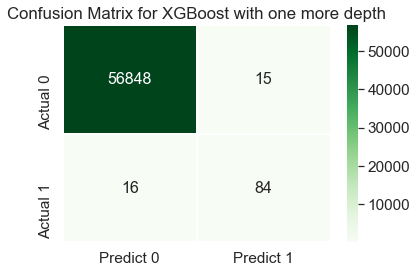

AUC value is: 0.9835787770606546
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9995014170693135, 'sensitivity': 0.8271836734693878, 'specificity': 0.9997995181400909, 'precision': 0.8777668909416588, 'f1': 0.8513994360334005, 'auc': 0.9778305328919814, 'pr_auc': 0.8408180626770342, 'actual_accuracy': 0.9654471544715447}


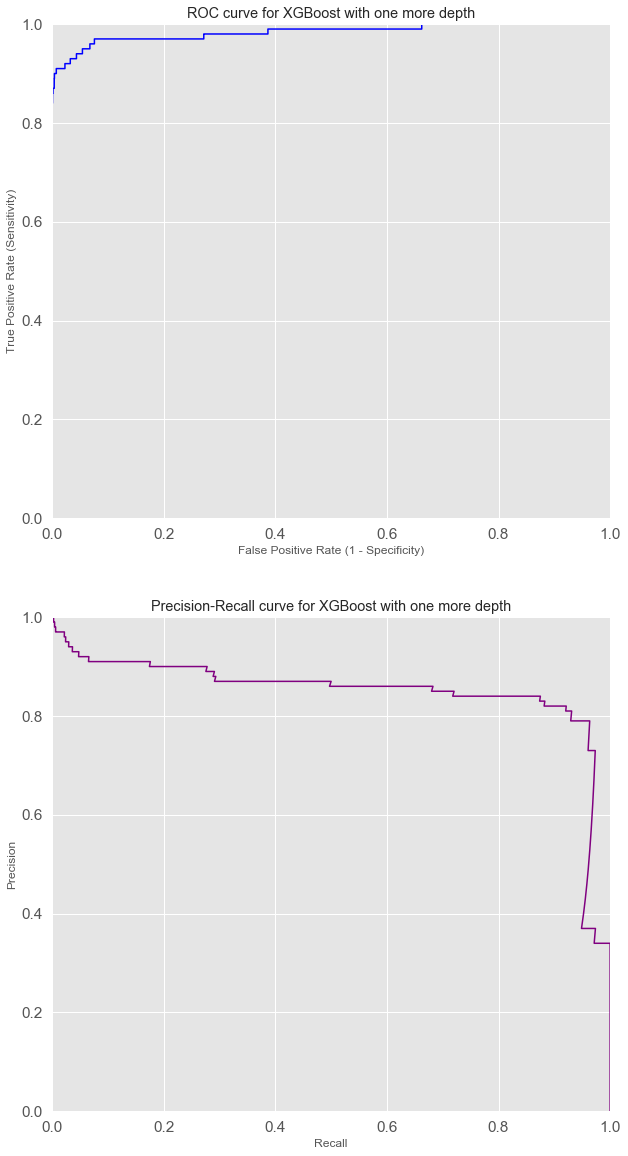

In [9]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostplus1', 'XGBoost with one more depth', 5)

In [10]:
results['final']

{'accuracy': 0.9995014170693135,
 'sensitivity': 0.8271836734693878,
 'specificity': 0.9997995181400909,
 'precision': 0.8777668909416588,
 'f1': 0.8513994360334005,
 'auc': 0.9778305328919814,
 'pr_auc': 0.8408180626770342,
 'actual_accuracy': 0.9654471544715447}

In [11]:
results

{'accuracy': [0.9994733238531627,
  0.9995786590825302,
  0.999490879724724,
  0.9995084355962852,
  0.9994557870898654],
 'actual_accuracy': [0.9634146341463414,
  0.9735772357723578,
  0.9613821138211383,
  0.9613821138211383,
  0.967479674796748],
 'sensitivity': [0.8163265306122449,
  0.8673469387755102,
  0.8061224489795918,
  0.8061224489795918,
  0.84],
 'specificity': [0.9997889664632538,
  0.999806552591316,
  0.9998241387193781,
  0.9998417248474404,
  0.9997362080790673],
 'precision': [0.8695652173913043,
  0.8854166666666666,
  0.8876404494382022,
  0.8977272727272727,
  0.8484848484848485],
 'f1': [0.8421052631578948,
  0.8762886597938144,
  0.8449197860962567,
  0.849462365591398,
  0.8442211055276383],
 'auc': [0.9810724810473579,
  0.9801376347806239,
  0.9608046479059766,
  0.9835591236652936,
  0.9835787770606546],
 'pr_auc': [0.8330757056545831,
  0.8656811108304565,
  0.8272333048879611,
  0.8271878173573716,
  0.850912374654799],
 'final': {'accuracy': 0.999501417

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.038544	validation_1-error:0.03311
[5]	validation_0-error:0.028496	validation_1-error:0.01343
[10]	validation_0-error:0.024906	validation_1-error:0.009252
[15]	validation_0-error:0.023563	validation_1-error:0.009252
[20]	validation_0-error:0.020492	validation_1-error:0.008725
[25]	validation_0-error:0.018274	validation_1-error:0.008532
[30]	validation_0-error:0.015634	validation_1-error:0.008058
[35]	validation_0-error:0.013141	validation_1-error:0.007584
[40]	validation_0-error:0.010761	validation_1-error:0.007022
[45]	validation_0-error:0.00916	validation_1-error:0.006654
[50]	validation_0-error:0.007819	validation_1-error:

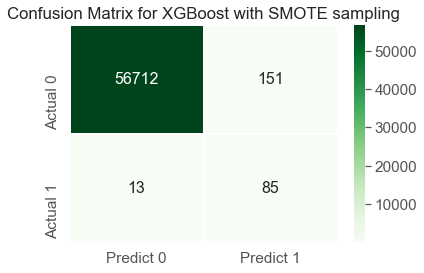

AUC value is: 0.9852116813522799
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.034783	validation_1-error:0.034936
[5]	validation_0-error:0.022308	validation_1-error:0.015853
[10]	validation_0-error:0.01838	validation_1-error:0.013149
[15]	validation_0-error:0.015548	validation_1-error:0.011218
[20]	validation_0-error:0.013027	validation_1-error:0.010253
[25]	validation_0-error:0.010332	validation_1-error:0.008936
[30]	validation_0-error:0.008727	validation_1-error:0.008199
[35]	validation_0-error:0.007652	validation_1-error:0.007742
[40]	validation_0-error:0.006505	validation

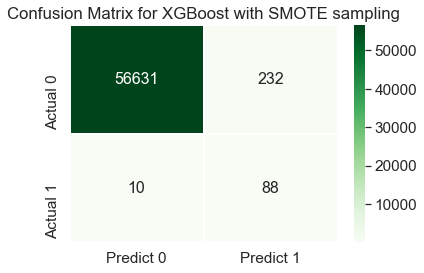

AUC value is: 0.9755014469076588
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.031646	validation_1-error:0.029073
[5]	validation_0-error:0.022616	validation_1-error:0.014782
[10]	validation_0-error:0.018714	validation_1-error:0.010112
[15]	validation_0-error:0.015957	validation_1-error:0.008813
[20]	validation_0-error:0.013629	validation_1-error:0.008831
[25]	validation_0-error:0.011235	validation_1-error:0.008515
[30]	validation_0-error:0.009527	validation_1-error:0.008532
[35]	validation_0-error:0.008263	validation_1-error:0.007619
[40]	validation_0-error:0.007213	valid

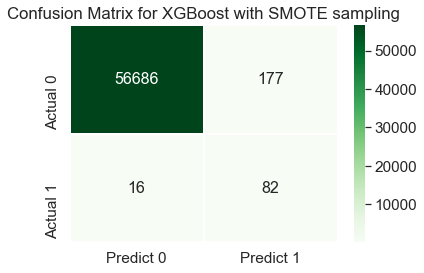

AUC value is: 0.9599318017131759
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.037318	validation_1-error:0.027282
[5]	validation_0-error:0.0271	validation_1-error:0.009884
[10]	validation_0-error:0.022251	validation_1-error:0.008813
[15]	validation_0-error:0.019631	validation_1-error:0.008532
[20]	validation_0-error:0.01643	validation_1-error:0.008515
[25]	validation_0-error:0.015131	validation_1-error:0.008708
[30]	validation_0-error:0.013686	validation_1-error:0.008216
[35]	validation_0-error:0.012165	validation_1-error:0.007865
[40]	validation_0-error:0.010901	validati

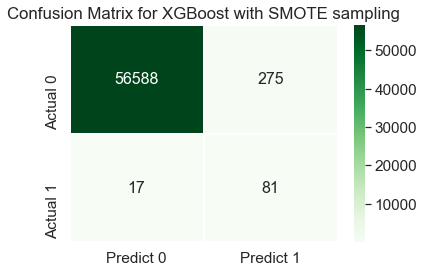

AUC value is: 0.9781404428187046
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.036542	validation_1-error:0.036796
[5]	validation_0-error:0.025344	validation_1-error:0.015888
[10]	validation_0-error:0.020081	validation_1-error:0.013518
[15]	validation_0-error:0.017747	validation_1-error:0.011938
[20]	validation_0-error:0.015408	validation_1-error:0.01206
[25]	validation_0-error:0.013066	validation_1-error:0.011797
[30]	validation_0-error:0.011675	validation_1-error:0.011148
[35]	validation_0-error:0.010349	validation_1-error:0.01041
[40]	validation_0-error:0.009294	validation_1-error:0.009691
[45]	validation_0-error:0.008334	vali

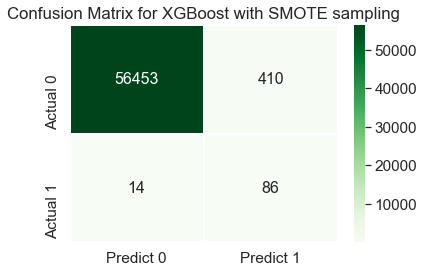

AUC value is: 0.9755466647908131
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9953828580497406, 'sensitivity': 0.8577142857142857, 'specificity': 0.9956210541125161, 'precision': 0.27053739895791484, 'f1': 0.40696744377358723, 'auc': 0.9748664075165265, 'pr_auc': 0.8183695802063783, 'actual_accuracy': 0.96869918699187}


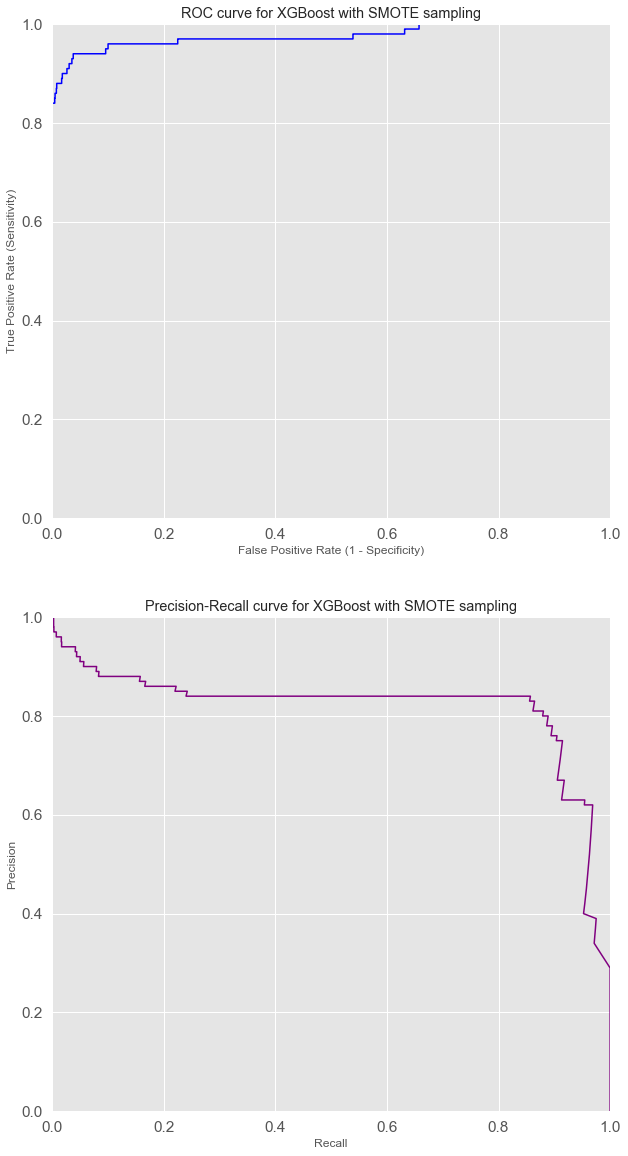

In [12]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'XGBoost', 'XGBoost with SMOTE sampling', 5)

In [13]:
results['final']

{'accuracy': 0.9953828580497406,
 'sensitivity': 0.8577142857142857,
 'specificity': 0.9956210541125161,
 'precision': 0.27053739895791484,
 'f1': 0.40696744377358723,
 'auc': 0.9748664075165265,
 'pr_auc': 0.8183695802063783,
 'actual_accuracy': 0.96869918699187}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.011594	validation_1-error:0.006671
[5]	validation_0-error:0.002537	validation_1-error:0.003318
[10]	validation_0-error:0.001266	validation_1-error:0.003002
[15]	validation_0-error:0.000618	validation_1-error:0.001738
[20]	validation_0-error:0.000299	validation_1-error:0.001229
[25]	validation_0-error:0.000233	validation_1-error:0.001018
[30]	validation_0-error:0.000198	validation_1-error:0.00093
[35]	validation_0-error:0.000145	validation_1-error:0.000825
[40]	validation_0-error:0.000134	validation_1-error:0.000737
[45]	validation_0-error:0.00013	validation_1-error:0.000737
[50]	validation_0-error:6.2e-05	validation_1-error:0.000579
[55]	validation_0-error:6.2e-05	validation_1-erro

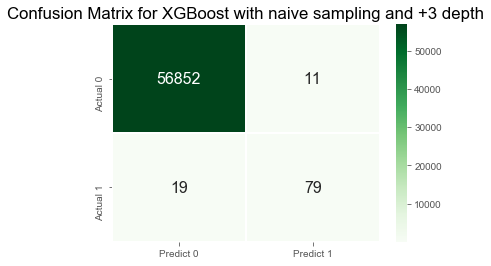

AUC value is: 0.9874108446114848
Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.006456	validation_1-error:0.012851
[5]	validation_0-error:0.001332	validation_1-error:0.002633
[10]	validation_0-error:0.001323	validation_1-error:0.002668
[15]	validation_0-error:0.000774	validation_1-error:0.001756
[20]	validation_0-error:0.000556	validation_1-error:0.001264
[25]	validation_0-error:0.000411	validation_1-error:0.000983
[30]	validation_0-error:0.000319	validation_1-error:0.000878
[35]	validation_0-error:0.000253	validation_1-error:0.000808
[40]	validation_0-error:0.000189	validation_1-error:0.000597
[45]	validation_0-error:0.00016	validat

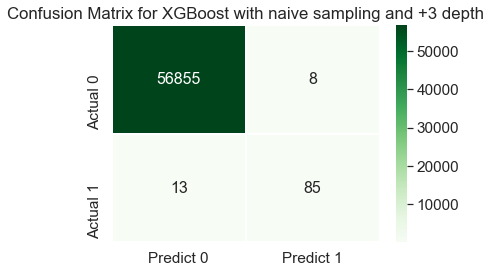

AUC value is: 0.977266609649329
Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.00707	validation_1-error:0.010235
[5]	validation_0-error:0.001985	validation_1-error:0.004881
[10]	validation_0-error:0.001268	validation_1-error:0.003213
[15]	validation_0-error:0.000648	validation_1-error:0.001914
[20]	validation_0-error:0.000479	validation_1-error:0.00151
[25]	validation_0-error:0.000382	validation_1-error:0.001334
[30]	validation_0-error:0.00033	validation_1-error:0.001299
[35]	validation_0-error:0.000215	validation_1-error:0.001124
[40]	validation_0-error:0.000189	validation_1-error:0.001001
[45]	validation_0-error:0.000165	valida

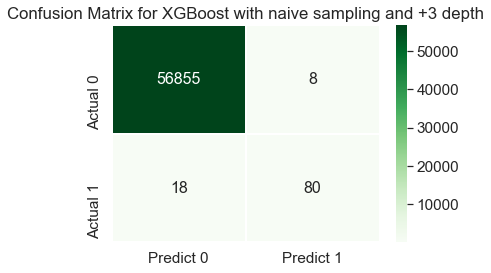

AUC value is: 0.9696781953904963
Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.010602	validation_1-error:0.015976
[5]	validation_0-error:0.00355	validation_1-error:0.00309
[10]	validation_0-error:0.00086	validation_1-error:0.002791
[15]	validation_0-error:0.000567	validation_1-error:0.002142
[20]	validation_0-error:0.000431	validation_1-error:0.001826
[25]	validation_0-error:0.00035	validation_1-error:0.001492
[30]	validation_0-error:0.000251	validation_1-error:0.001159
[35]	validation_0-error:0.000207	validation_1-error:0.001053
[40]	validation_0-error:0.000182	validation_1-error:0.00093
[45]	validation_0-error:0.00016	validati

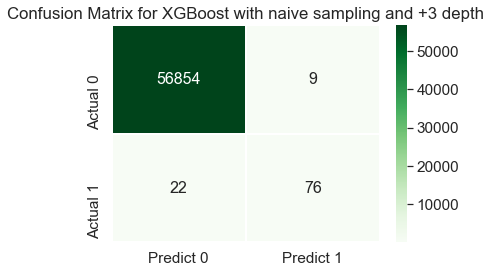

AUC value is: 0.9859614246486453
Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.003618	validation_1-error:0.00797
[5]	validation_0-error:0.003425	validation_1-error:0.007514
[10]	validation_0-error:0.001521	validation_1-error:0.004108
[15]	validation_0-error:0.000714	validation_1-error:0.00237
[20]	validation_0-error:0.000585	validation_1-error:0.001966
[25]	validation_0-error:0.000407	validation_1-error:0.001685
[30]	validation_0-error:0.000251	validation_1-error:0.001317
[35]	validation_0-error:0.000193	validation_1-error:0.001053
[40]	validation_0-error:0.000152	validation_1-error:0.001001
[45]	validation_0-error:0.000123	validation_1-error:0.000895
[50]	validation_0-error:0.000112	v

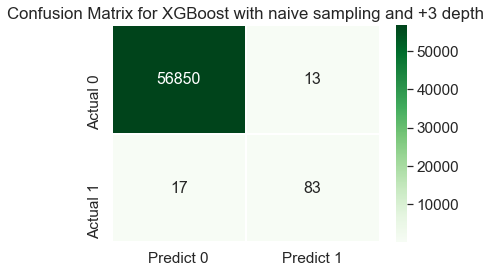

AUC value is: 0.9764887536711042
Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9995154616432833, 'sensitivity': 0.8190612244897959, 'specificity': 0.9998276559449906, 'precision': 0.8919096323768999, 'f1': 0.8536465620211311, 'auc': 0.9793611655942118, 'pr_auc': 0.848661493811453, 'actual_accuracy': 0.9638211382113822}


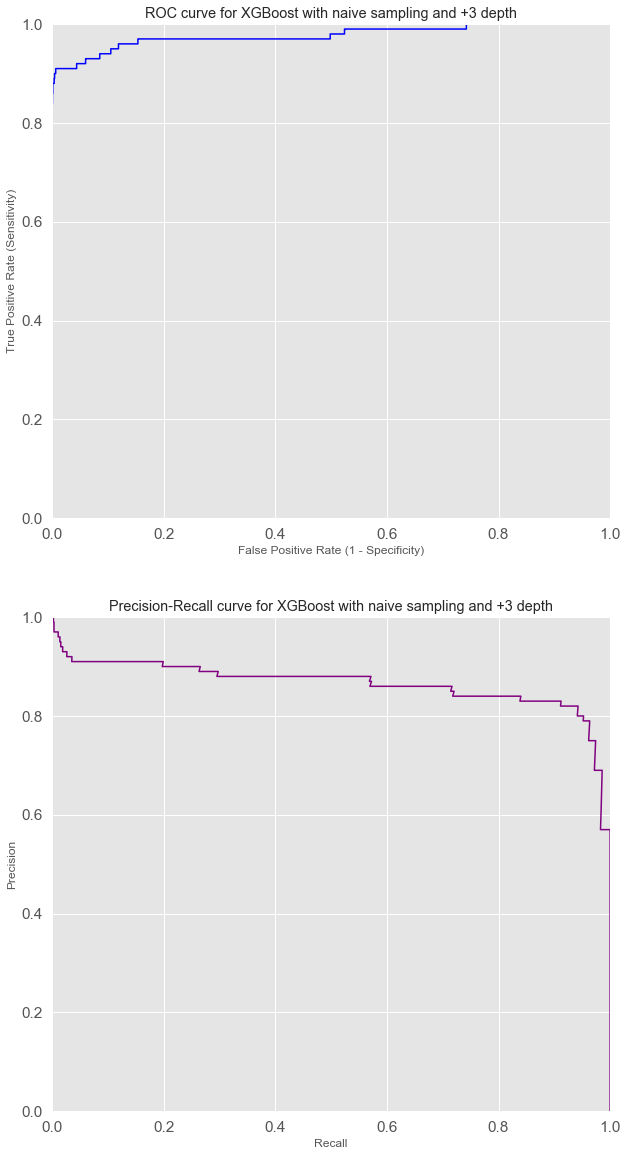

In [7]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostplus3', 'XGBoost with naive sampling and +3 depth', 5)

In [8]:
results['final']

{'accuracy': 0.9995154616432833,
 'sensitivity': 0.8190612244897959,
 'specificity': 0.9998276559449906,
 'precision': 0.8919096323768999,
 'f1': 0.8536465620211311,
 'auc': 0.9793611655942118,
 'pr_auc': 0.848661493811453,
 'actual_accuracy': 0.9638211382113822}

In [9]:
results

{'accuracy': [0.9994733238531627,
  0.9996313266972139,
  0.9995435473394076,
  0.9994557679816014,
  0.9994733423450309],
 'actual_accuracy': [0.9613821138211383,
  0.9735772357723578,
  0.9634146341463414,
  0.9552845528455285,
  0.9654471544715447],
 'sensitivity': [0.8061224489795918,
  0.8673469387755102,
  0.8163265306122449,
  0.7755102040816326,
  0.83],
 'specificity': [0.999806552591316,
  0.9998593109755025,
  0.9998593109755025,
  0.9998417248474404,
  0.9997713803351916],
 'precision': [0.8777777777777778,
  0.9139784946236559,
  0.9090909090909091,
  0.8941176470588236,
  0.8645833333333334],
 'f1': [0.8404255319148936,
  0.8900523560209423,
  0.8602150537634408,
  0.8306010928961749,
  0.8469387755102041],
 'auc': [0.9874108446114848,
  0.977266609649329,
  0.9696781953904963,
  0.9859614246486453,
  0.9764887536711042],
 'pr_auc': [0.8470947594021584,
  0.8763723189943862,
  0.8228349395015407,
  0.8314946836031577,
  0.8655107675560216],
 'final': {'accuracy': 0.999515

# Results:
## XGBoost

Sampling types:
naive,naive,naive,smote

Depth:
sqrt(num of features), sqrt(num of features) - 1, sqrt(num of features) + 1, sqrt(num of features)

sensitivity: 0.8293, 0.8414, 0.8272, 0.8699
precision: 0.7976, 0.6416, 0.8778, 0.2769
f1: 0.8129, 0.7275, 0.8514, 0.4154
auc: 0.9145, 0.9203, 0.9135, 0.9328

## Sensitivity increases when the tree depth is not too deep and SMOTE sampling is used
## f1 and precision is best when tree depth is deeper and naive sampling is used
Likely that there's a tradeoff between overfitting a bit more and getting more True Positive & more False Positive
### SMOTE sampling is also more aggressive and allows model to find more fraud cases, but at the expense of precision
### If we use AUC which is a fairer metric, looks like SMOTE + depth = sqrt(num of features) gives good balance between high sensitivty (important in fraud) but not toopoor precision
### However if precision is key here, using a tree with greater depth and naive sampling is better (Case 3 has high precision of 0.8778)
